# Analyzing the Influence of Historical Events and Seasonality on movies

## Table of Contents

1. [Data Sources and Context](#Data-Sources-and-Context)
2. [Data Loading and Exploration](#Data-Loading-and-Exploration)
3. [Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis-EDA)
4. [EDA Historical events](#Identifying-periods-in-history-that-can-have-an-effect-in-movie-genres)
5. [EDA Seasons](#Exploratory-Data-Analysis-EDA)


## Data Sources and Context

This project uses the CMU Movie Summary Corpus dataset, which is a rich collection of movie metadata and plot summaries. The dataset contains information on:

- **42,306 Movies**: Plot summaries along with metadata such as genre, date of release, and box office revenue.
- **Character-Level Metadata**: Details like character gender and estimated age.

The dataset offers a wide-ranging historical perspective, which makes it an ideal choice for analyzing trends in the movie industry over time, as well as studying the impact of socio-political and economic events on movie themes, genres, and success metrics.

The data spans multiple decades, providing the opportunity to conduct in-depth analyses regarding:
- How movie releases and their genres have shifted over time.
- The influence of significant socio-political events like the World Wars, economic recessions, and major cultural movements.
- Seasonal patterns in movie releases, such as the popularity of horror films in October or family-oriented films during holiday seasons.

Understanding the dataset's context and its metadata will allow us to identify meaningful trends and answer our research questions comprehensively.



Features in our cleaned dataset:



*   **wikipedia_id** - A unique identifier for the movie's Wikipedia page
*   **freebase_id** - A unique identifier used by Freebase
*   **name** - The title of the movie
*   **languages** - A list of languages spoken in the movie
*   **countries** - The list of countries where the movie was produced or released
*   **budget** - The total production cost of the movie
*   **popularity** -  A numeric value indicating the movie's popularity from TMDB website
*   **revenue** - The total amount of money the movie earned from all sources
*   **runtime** - The total length of the movie in minutes
*   **genre** - The categories or types of the movie
*   **release_date** - The official date when the movie was released





## Data Loading and Exploration

In this section, we will load the dataset and explore its structure to gain an initial understanding of the data. This step is crucial for identifying the variables we have available, their types, and any potential issues (such as missing values) that may need to be addressed during the data cleaning process.

### Importing Required Libraries
First, we will import the necessary libraries for data manipulation, visualization, and analysis. The main libraries used are:
- **Pandas** for data manipulation and analysis.
- **NumPy** for numerical computations.
- **Matplotlib** for visualizing the data.

In [109]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import re
import seaborn as sns
from sklearn.linear_model import LinearRegression
from numpy.polynomial import Polynomial
import statsmodels.formula.api as smf
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
import statsmodels.api as sm
from statsmodels.formula.api import ols

Loading the Dataset Now, we load the dataset and display the first few rows to get an overview of the data.

In [2]:
file_path = "../data/movies_dataset.tsv"
movies_df = pd.read_csv(file_path, sep='\t')

# dataset2 = 'character.metadata.tsv'
# character_df = pd.read_csv(dataset2, sep='\t')

In [3]:
# Data overview
movies_df.head()

wikipedia_id freebase_id  \
0        975900   /m/03vyhn   
1       3196793   /m/08yl5d   
2      28463795  /m/0crgdbh   
3       9363483  /m/0285_cd   
4        261236   /m/01mrr1   

                                                name           languages  \
0                                     Ghosts of Mars    English Language   
1  Getting Away with Murder: The JonBenét Ramsey ...    English Language   
2                                        Brun bitter  Norwegian Language   
3                                   White Of The Eye    English Language   
4                                  A Woman in Flames     German Language   

                  countries      budget  popularity     revenue  runtime  \
0  United States of America  28000000.0      14.189  14010832.0     98.0   
1  United States of America         NaN       0.600         NaN     95.0   
2                    Norway         NaN         NaN         NaN     83.0   
3            United Kingdom         NaN         NaN         NaN    110.0   
4                   Germany         NaN       2.801         NaN    106.0   

                                              genres release_date  
0  Science Fiction, Action, Thriller, Horror, Adv...   2001-08-24  
1                                     Mystery, Drama   2000-02-16  
2                                              Drama         1988  
3                                           Thriller         1987  
4                                              Drama   1983-05-11

Initial Exploration
After loading the dataset, we conduct some initial exploration to understand its structure and content:

- Shape of the Dataset: Get the number of rows and columns to understand the dataset size.
- Summary Statistics: Use basic statistics to understand distributions and spot any anomalies.

In [ ]:
#Columns
print("Number of columns in movie_metadata:", len(movies_df.columns))
# print("Number of columns in character_metadata:", len(character_df.columns))

# movies_df.columns = [
#     'Wikipedia movie ID', 'Freebase movie ID', 'Movie name', 'languages', 'Movie countries', 'budget',
#     'popularity', 'revenue', 'runtime', 'genres', 'release_date']


# # character_df.columns = [
# #     'Wikipedia Movie ID	', 'Freebase Movie ID',' Movie release_date', 'Character Name', 'Actor DOB',
# #     'Actor gender', 'Actor height', 'Actor ethnicity', 'Actor Name',
# #     'Actor age at movie release', 'Freebase character map', 'Freebase character ID',  'Freebase actor ID'
# # ]

Number of columns in movie_metadata: 11


In [5]:
print("Movie Metadata Sample:")
movies_df.info()

Movie Metadata Sample:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81628 entries, 0 to 81627
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Wikipedia movie ID  81628 non-null  int64  
 1   Freebase movie ID   81628 non-null  object 
 2   Movie name          81628 non-null  object 
 3   Movie languages     72754 non-null  object 
 4   Movie countries     75822 non-null  object 
 5   Budget              8290 non-null   float64
 6   Popularity          49929 non-null  float64
 7   Revenue             11032 non-null  float64
 8   Movie runtime       67952 non-null  float64
 9   Movie genres        81628 non-null  object 
 10  Release date        74850 non-null  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 6.9+ MB


In [6]:
print("\nSummary Statistics for Numeric Columns:")
movies_df.describe().T


Summary Statistics for Numeric Columns:


count          mean           std     min          25%  \
Wikipedia movie ID  81628.0  1.739927e+07  1.098763e+07  330.00  7317442.250   
Budget               8290.0  1.855514e+07  3.040164e+07    1.00  1250750.000   
Popularity          49929.0  4.915950e+00  7.775740e+00    0.00        1.067   
Revenue             11032.0  4.117780e+07  1.056461e+08    1.00  1500000.000   
Movie runtime       67952.0  1.095071e+02  4.140910e+03    0.03       80.000   

                             50%           75%           max  
Wikipedia movie ID  1.775422e+07  2.713261e+07  3.750192e+07  
Budget              6.850000e+06  2.200000e+07  3.790000e+08  
Popularity          2.171000e+00  5.572000e+00  3.007380e+02  
Revenue             7.241692e+06  3.130311e+07  2.782275e+09  
Movie runtime       9.300000e+01  1.080000e+02  1.079281e+06

In [7]:
# print("\nCharacter Metadata Sample:")
# character_df.info()

### Handling Missing Values
The first step in our data cleaning process is to identify any missing values and decide on the appropriate strategy for handling them. Missing values can affect our analysis and models, so we will either fill them in with suitable values or remove the affected rows if necessary.


In [8]:
print("\nMissing Values in Each Column:")
print(movies_df.isnull().sum())


Missing Values in Each Column:
Wikipedia movie ID        0
Freebase movie ID         0
Movie name                0
Movie languages        8874
Movie countries        5806
Budget                73338
Popularity            31699
Revenue               70596
Movie runtime         13676
Movie genres              0
Release date           6778
dtype: int64


If we look at the numbers, the most problematic ones are revenue  and budget, other ones have reasonable amount of missing values
Let's plot this just to be sure

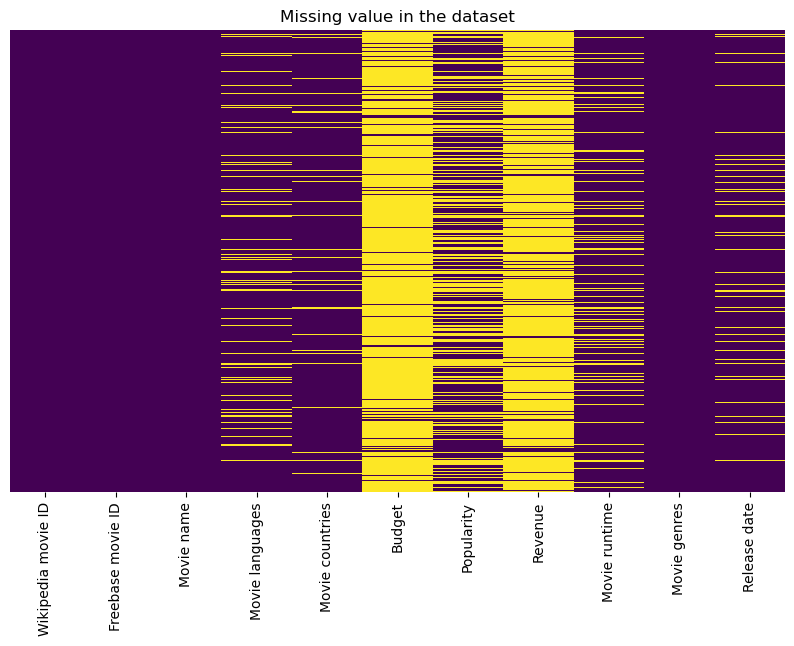

In [9]:

plt.figure(figsize=(10, 6))
sns.heatmap(movies_df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing value in the dataset')
plt.show()

### Feature Engineering

Feature engineering involves creating new variables or modifying existing ones to improve the effectiveness of our analysis and models. By generating features that better capture the relationships in the data, we can enhance our ability to draw meaningful insights.



In [ ]:
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'], errors='coerce')

In [ ]:
# character_df[' Movie release_date'] = pd.to_datetime(character_df[' Movie release_date'], errors='coerce')
# character_df['Actor DOB'] = pd.to_datetime(character_df['Actor DOB'], errors='coerce')

In [ ]:
movies_df['Release year'] = movies_df['release_date'].dt.year
movie_count_by_year = movies_df['Release year'].value_counts().sort_index()

In [ ]:
def parse_genres(x):
    if isinstance(x, str):
        try:
            return ast.literal_eval(x)
        except (ValueError, SyntaxError):
            return [genre.strip() for genre in x.split(',')]
    return x

movies_df['genres'] = movies_df['genres'].apply(parse_genres)

all_genres = set()
for genres_list in movies_df['genres']:
    if isinstance(genres_list, list):
        all_genres.update(genres_list)

all_genres_list = sorted(all_genres)

print("Number of genres:", len(all_genres_list))
print(all_genres_list)


Number of genres: 21
['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Experimental', 'Family', 'Fantasy', 'Historical', 'Horror', 'Musical', 'Mystery', 'Other', 'Romance', 'Science Fiction', 'Superhero', 'Thriller', 'War', 'Western']


In [ ]:
# Converting to lists genre column, country and language column
movies_df['Movie countries'] = movies_df['Movie countries'].str.split(', ')
movies_df['languages'] = movies_df['languages'].str.split(', ')

## Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is the process of exploring and visualizing the dataset to better understand its structure, relationships, and key patterns. This step helps in identifying important trends, outliers, and potential correlations that will guide further analysis and feature engineering.

Features in our cleaned dataset:

*   **wikipedia_id** - A unique identifier for the movie's Wikipedia page
*   **freebase_id** - A unique identifier used by Freebase
*   **name** - The title of the movie
*   **languages** - A list of languages spoken in the movie
*   **countries** - The list of countries where the movie was produced or released
*   **budget** - The total production cost of the movie
*   **popularity** -  A numeric value indicating the movie's popularity from TMDB website
*   **revenue** - The total amount of money the movie earned from all sources
*   **runtime** - The total length of the movie in minutes
*   **genre** - The categories or types of the movie
*   **release_date** - The official date when the movie was released





 From which country do most movies come from?

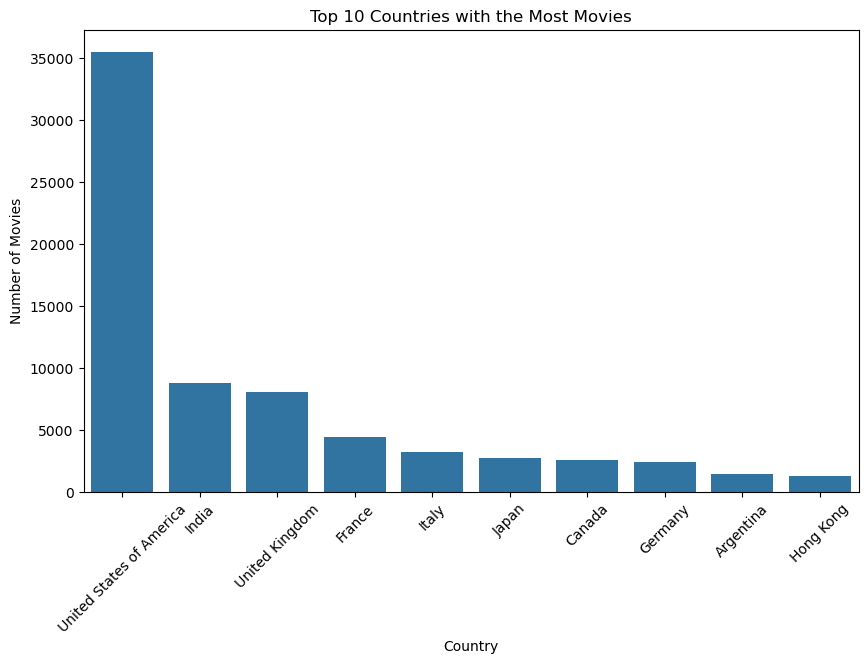

In [15]:
# count different countries
country_counts = movies_df['Movie countries'].explode().value_counts() #since we can have more than 1 country in countries column

top_10_countries = country_counts.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_countries.index, y=top_10_countries.values)
plt.title('Top 10 Countries with the Most Movies')
plt.xlabel('Country')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

Let's also visualize most popular languages

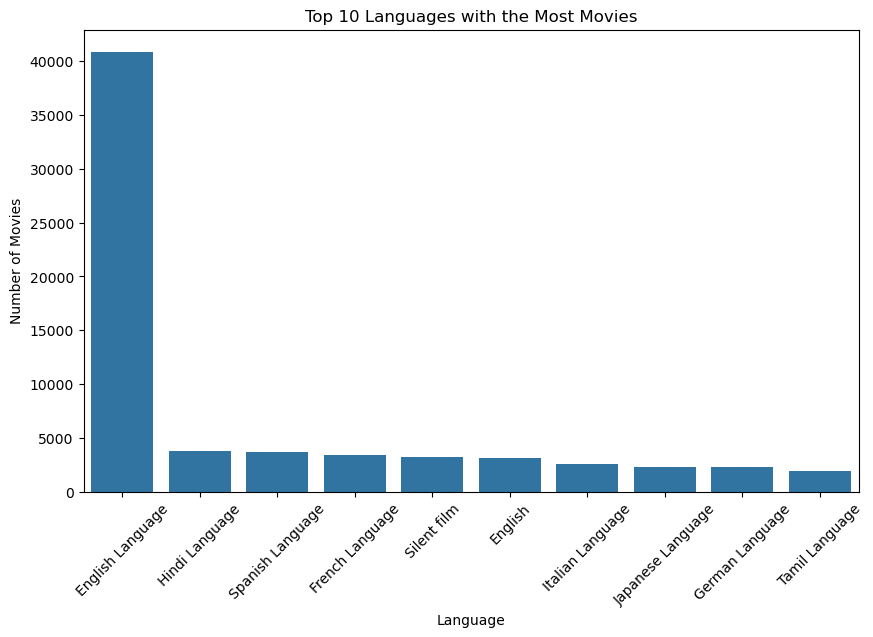

In [ ]:
language_counts = movies_df['languages'].explode().value_counts() # same thing as for countries, there could be more languages
top_10_languages = language_counts.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_languages.index, y=top_10_languages.values)
plt.title('Top 10 Languages with the Most Movies')
plt.xlabel('Language')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

 Okay, so our dataset thinks that English and English Language are two different languages... There are probably more languages with the same mistake
Let's fix this.

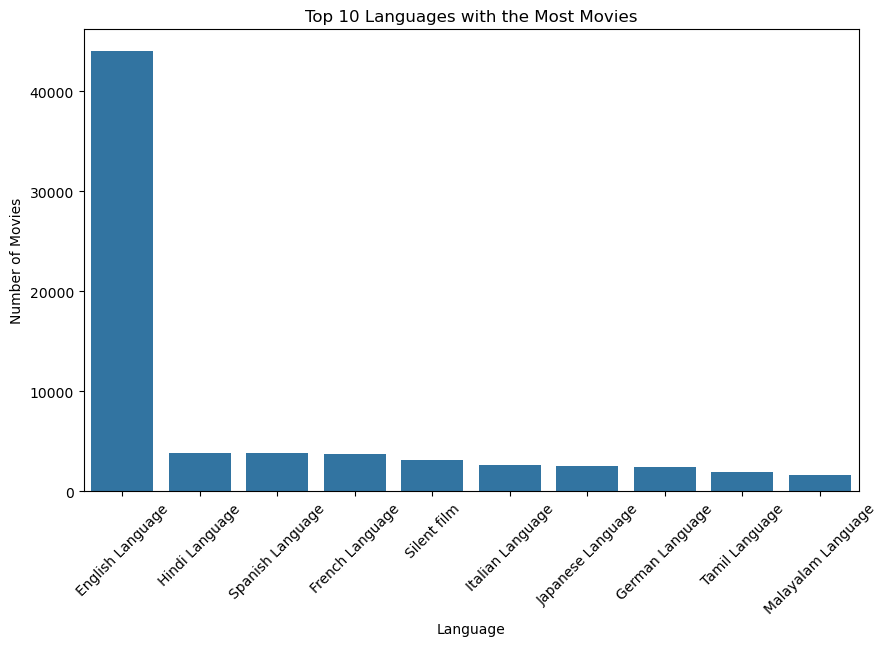

In [ ]:

movies_df['languages'] = movies_df['languages'].apply(
    lambda x: [
        y if y == 'Silent film' else  # leave 'Silent film' unchanged
        y[:-8] + 'Language' if y.lower().endswith('language') else  # if it ends in 'language' make it 'Language'
        y + ' Language'  # add ' Language' if it doesn't end with 'language'
        for y in x] if isinstance(x, list) else x
)
# Now do the same plot again
language_counts = movies_df['languages'].explode().value_counts()
top_10_languages = language_counts.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_languages.index, y=top_10_languages.values)
plt.title('Top 10 Languages with the Most Movies')
plt.xlabel('Language')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

 We can also check the budgets of movies in our dataset

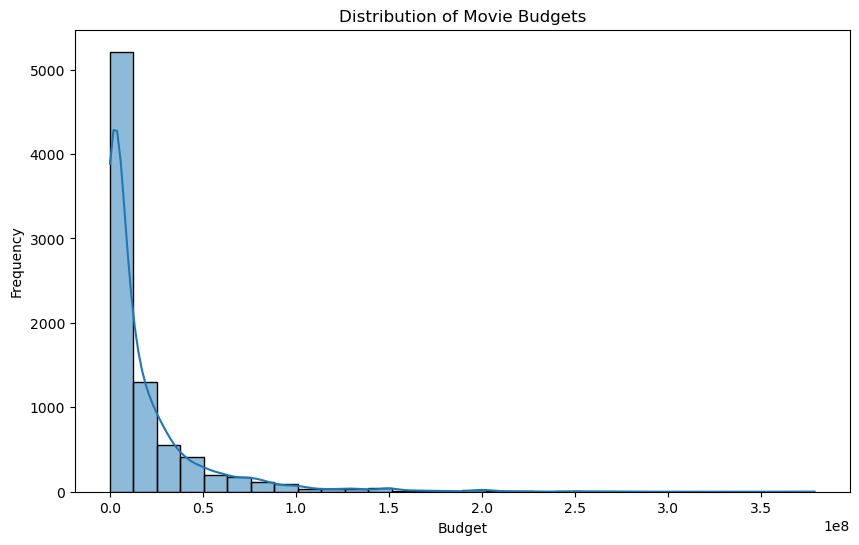

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(movies_df['budget'], bins=30, kde=True)
plt.title('Distribution of Movie budgets')
plt.xlabel('budget')
plt.ylabel('Frequency')
plt.show()

This is pretty weird distribution, a lot of movies have budget of zero...
Let's try to plot budgets in log-scale

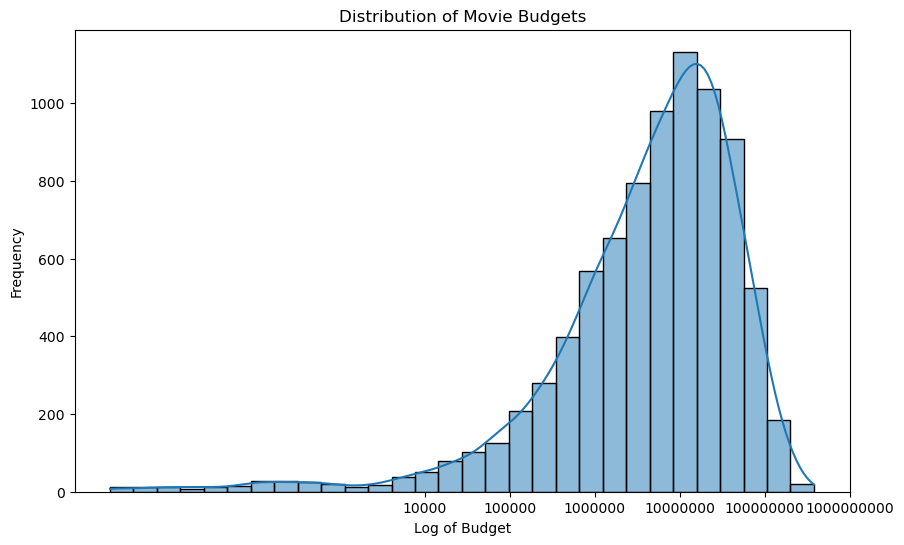

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(movies_df['budget']), bins=30, kde=True)
plt.title('Distribution of Movie budgets')
plt.xlabel('Log of budget')
plt.ylabel('Frequency')
plt.xticks(ticks=np.log1p([1e4,1e5,1e6, 1e7, 1e8, 1e9]), labels=[f'{int(x)}' for x in [1e4,1e5,1e6, 1e7, 1e8, 1e9]])
plt.show()

# change x axis to show not log values

In [ ]:
movies_df['budget'].describe()

count    8.290000e+03
mean     1.855514e+07
std      3.040164e+07
min      1.000000e+00
25%      1.250750e+06
50%      6.850000e+06
75%      2.200000e+07
max      3.790000e+08
Name: Budget, dtype: float64

As we seen from the table above, we have some pretty unusual values for min, that's what we are going to filter those values that are under of 2 percent percentile.

In [ ]:
percentile_2 = movies_df['budget'].quantile(0.02)
print(percentile_2)
movies_df.loc[movies_df['budget'] < percentile_2, 'budget'] = np.nan

997.14


Now look at the budget distribution.

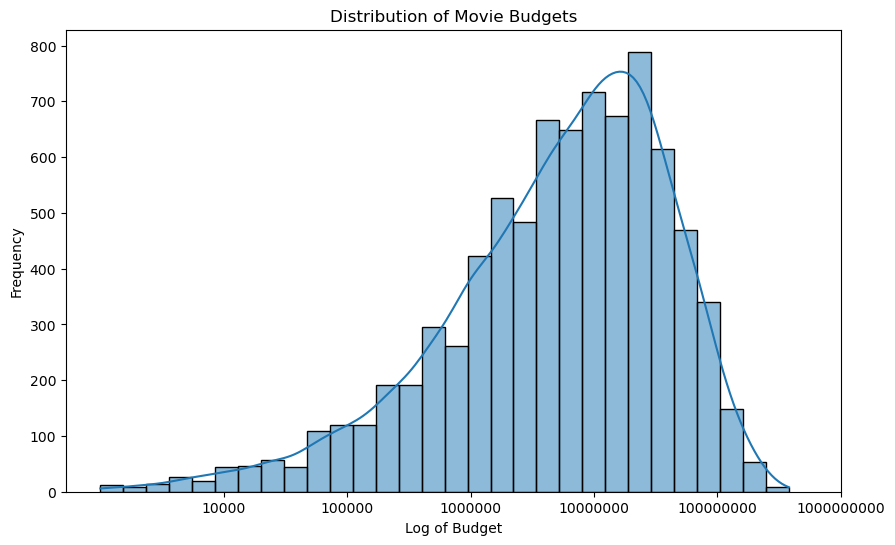

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(movies_df['budget']), bins=30, kde=True)
plt.title('Distribution of Movie budgets')
plt.xlabel('Log of budget')
plt.ylabel('Frequency')
plt.xticks(ticks=np.log1p([1e4,1e5,1e6, 1e7, 1e8, 1e9]), labels=[f'{int(x)}' for x in [1e4,1e5,1e6, 1e7, 1e8, 1e9]])
plt.show()


 It is also very useful to know distribution of revenues

Text(0, 0.5, 'Frequency')

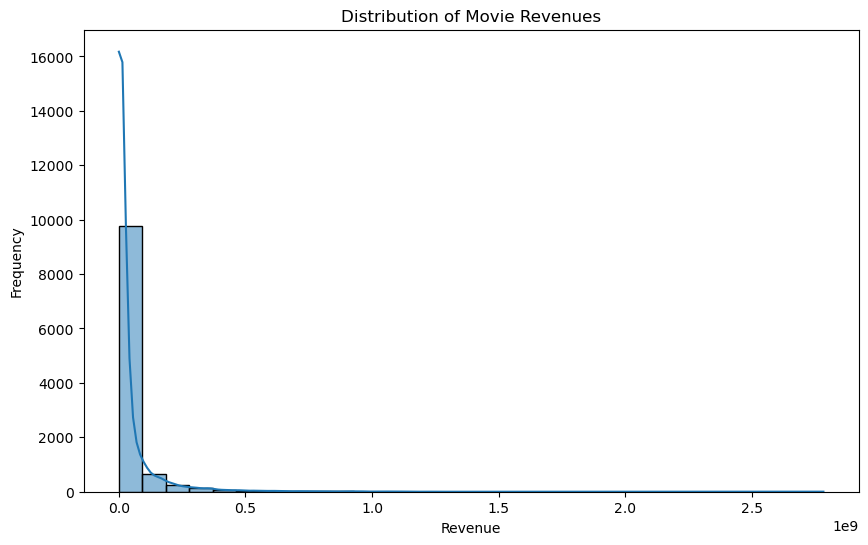

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(movies_df['revenue'], bins=30, kde=True)
plt.title('Distribution of Movie revenues')
plt.xlabel('revenue')
plt.ylabel('Frequency')

 How many zero values are there?

In [ ]:
zero_revenue_count = (movies_df['revenue'] == 0).sum()
print(f"Number of movies with zero revenue: {zero_revenue_count}")

Number of movies with zero revenue: 0


Let's again try with log-scale

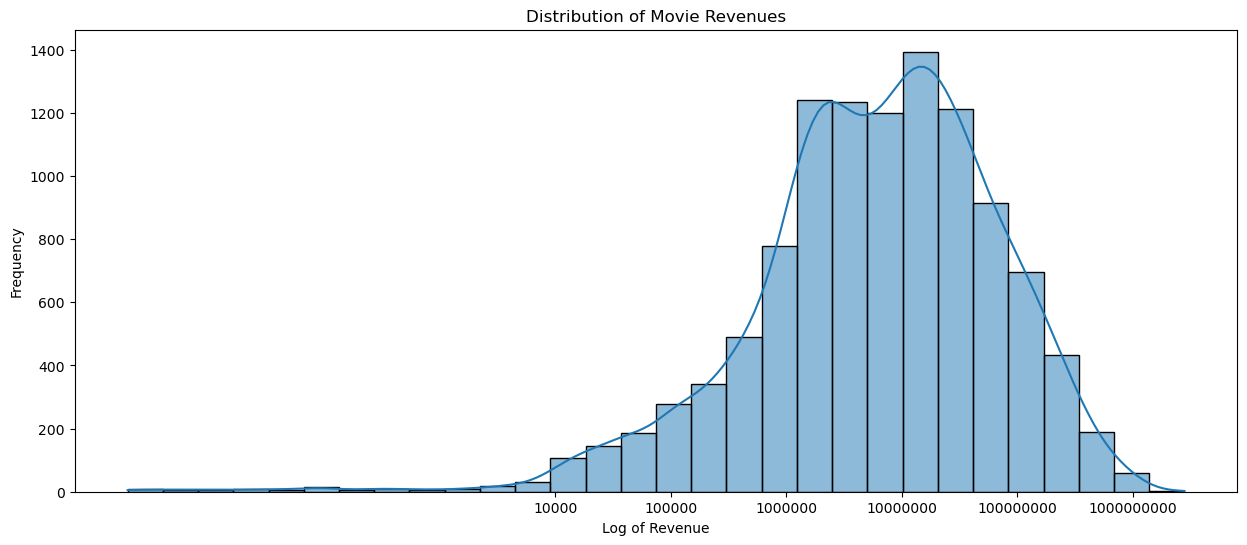

In [ ]:
plt.figure(figsize=(15, 6))
sns.histplot(np.log1p(movies_df['revenue']), bins=30, kde=True)
plt.title('Distribution of Movie revenues')
plt.xlabel('Log of revenue')
plt.ylabel('Frequency')
plt.xticks(ticks=np.log1p([1e4,1e5,1e6, 1e7, 1e8, 1e9]), labels=[f'{int(x)}' for x in [1e4,1e5,1e6, 1e7, 1e8, 1e9]]);

In [ ]:
# 5 percentile
movies_df['revenue'].describe()

count    1.103200e+04
mean     4.117780e+07
std      1.056461e+08
min      1.000000e+00
25%      1.500000e+06
50%      7.241692e+06
75%      3.130311e+07
max      2.782275e+09
Name: Revenue, dtype: float64

 We are going to filter also unrealistic values for revenue

In [ ]:
percentile_01 = movies_df['revenue'].quantile(0.001)
print(percentile_01)
movies_df[movies_df['revenue'] < percentile_01] = np.nan


4.0


After filtering

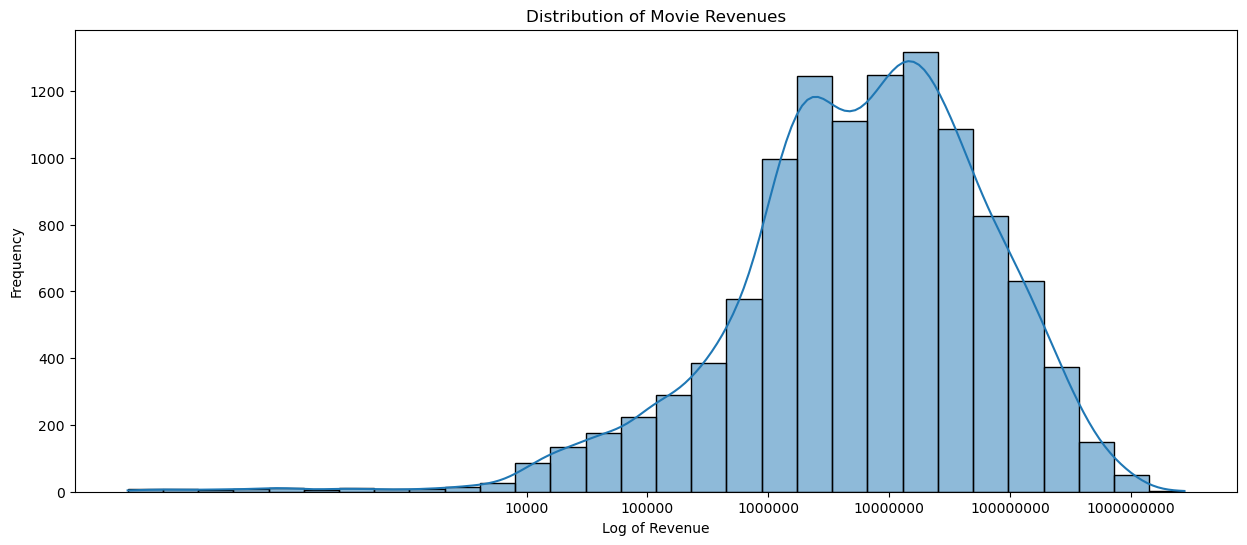

In [ ]:

plt.figure(figsize=(15, 6))
sns.histplot(np.log1p(movies_df['revenue']), bins=30, kde=True)
plt.title('Distribution of Movie revenues')
plt.xlabel('Log of revenue')
plt.ylabel('Frequency')
plt.xticks(ticks=np.log1p([1e4,1e5,1e6, 1e7, 1e8, 1e9]), labels=[f'{int(x)}' for x in [1e4,1e5,1e6, 1e7, 1e8, 1e9]]);

 Next valuable column - runtime!

Text(0, 0.5, 'Frequency')

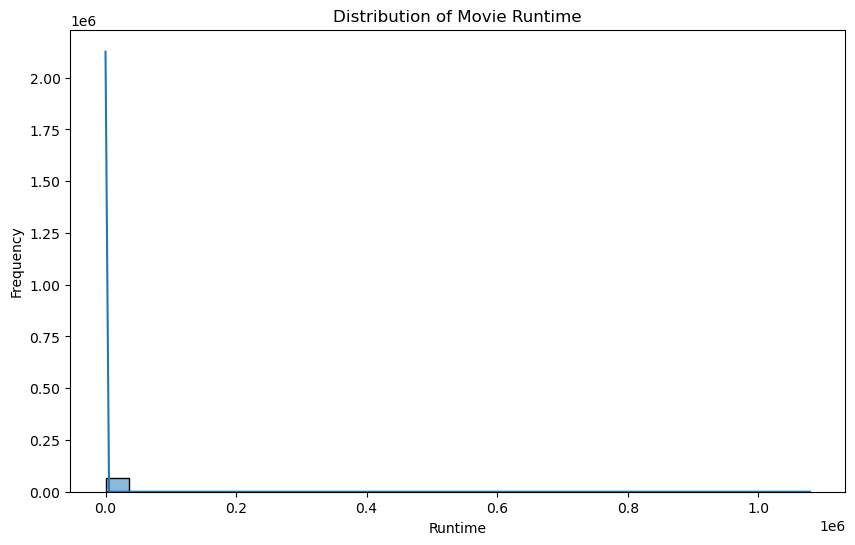

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(movies_df['runtime'], bins=30, kde=True)
plt.title('Distribution of runtime')
plt.xlabel('Runtime')
plt.ylabel('Frequency')

 Oop, again a lot of zero values, so distribution doesn't make sense

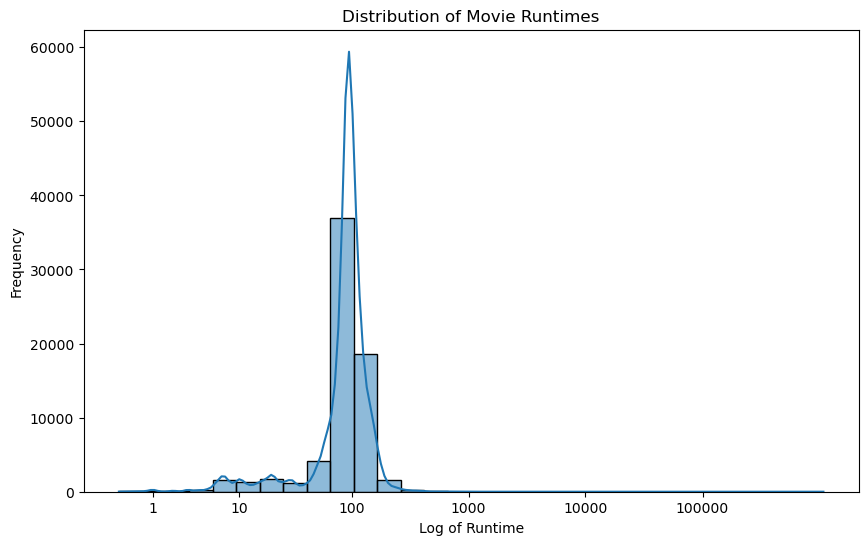

In [ ]:
# Log scale
plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(movies_df['runtime']), bins=30, kde=True)
plt.title('Distribution of runtimes')
plt.xlabel('Log of Runtime')
plt.ylabel('Frequency')
plt.xticks(ticks=np.log1p([1e1,1e2,1e3, 1e4, 1e5, 1]), labels=[f'{int(x)}' for x in [1e1,1e2,1e3, 1e4, 1e5, 1]]);

In [ ]:
movies_df['runtime'].describe()

count    6.794200e+04
mean     1.095069e+02
std      4.141214e+03
min      3.000000e-02
25%      8.000000e+01
50%      9.300000e+01
75%      1.070000e+02
max      1.079281e+06
Name: Movie runtime, dtype: float64

Filtering unrealistic values

In [ ]:

percentile_01 = movies_df['runtime'].quantile(0.01)
print(percentile_01)

movies_df[movies_df['runtime'] < percentile_01] = np.nan

#95 percentile
percentile_99 = movies_df['runtime'].quantile(0.999)
print(percentile_99)

max_value = movies_df['runtime'].max()
print(f"Maximum value in the 'runtime' column: {max_value}")
#Removing max
movies_df[movies_df['runtime'] > percentile_99] = np.nan

6.0
420.0
Maximum value in the 'Movie runtime' column: 1079281.0


Distribution after filtering make much more sense.

Text(0, 0.5, 'Frequency')

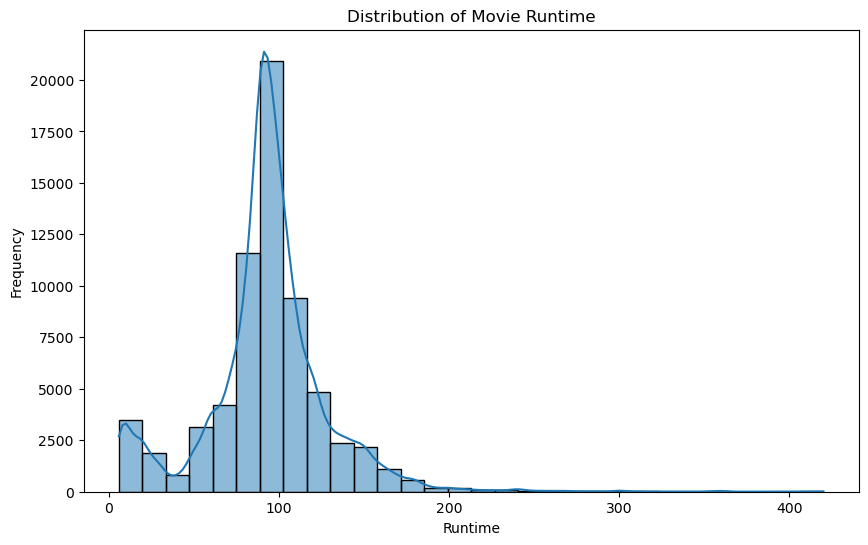

In [ ]:

plt.figure(figsize=(10, 6))
sns.histplot(movies_df['runtime'], bins=30, kde=True)
plt.title('Distribution of runtime')
plt.xlabel('Runtime')
plt.ylabel('Frequency')

 Distribution of movies through years

[2001. 2000. 1983. 1913. 2002. 1938. 1974. 1930. 1997. 1989. 1964. 1992.
 1999. 2009. 1962. 1931. 1935. 1959. 2007. 1979. 1984. 1958. 1986. 1940.
 2010. 1955. 1990. 2011. 1914. 1980. 2008. 1917. 1918. 1977. 1996. 1961.
 2006. 1911. 1993. 1939. 1945. 1994. 2003. 1976. 1949. 1975. 1991. 1923.
 1957. 1951. 1968. 1920. 1915. 2005. 1973. 1972. 1956. 1947. 1963. 2004.
 1929. 1954. 2012. 1985. 1995. 1978. 1936. 1934. 1998. 1926. 1953. 1971.
 1966. 1982. 1987. 1950. 1967. 1910. 1928. 1927. 1921. 1932. 1943. 1948.
 1970. 1933. 1960. 1942. 1981. 1944. 1952. 1965. 1922. 2013. 1969. 1924.
 1919. 1916. 1988. 1941. 1937. 1946. 1912. 1908. 1902. 1909. 1925. 2014.
 1903. 1904. 1907. 1905. 1900. 1892. 1899. 2016. 1898. 1901. 1906. 1894.
 1895. 1897. 1896.]


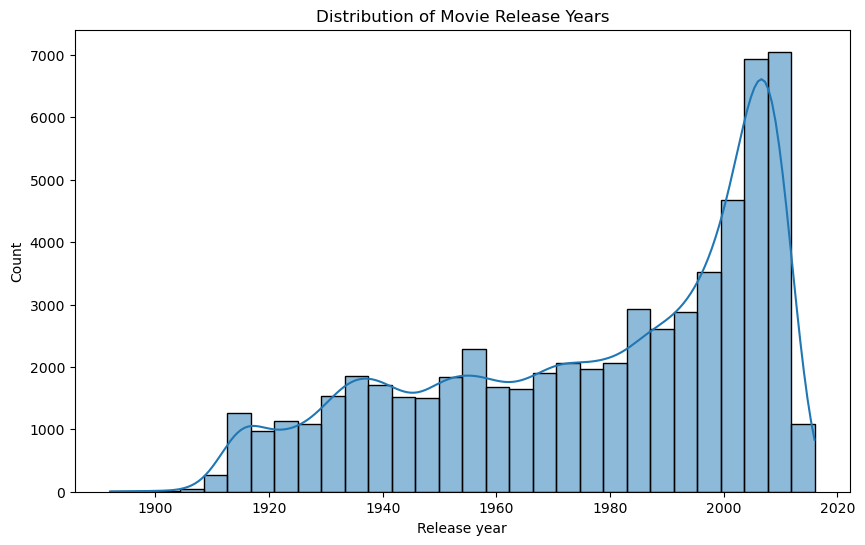

In [34]:
# We are interested in knowing the distribution of movies through the years
# To make it easier, we are going to create new column with only year
df_filtered = movies_df.dropna(subset=['Release year'])

# How many unique values for year are there?
df_filtered = df_filtered[df_filtered['Release year'] >= 1800]
print(df_filtered['Release year'].unique())

plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['Release year'], bins=30, kde=True)
plt.title('Distribution of Movie Release Years')
plt.show()

Let's see what are the most popular genres

In [ ]:


genre_counts = {}

for genre_list in df_filtered['genres'].dropna():
    for genre in genre_list:
        genre = genre.strip()
        if genre in genre_counts:
            genre_counts[genre] += 1
        else:
            genre_counts[genre] = 1

most_common_genres = sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)[:10]

print("10 Most Popular Genres:")
for genre, count in most_common_genres:
    print(f"{genre}: {count}")


10 Most Popular Genres:
Drama: 27331
Comedy: 14437
Action: 8480
Thriller: 7588
Other: 5930
Horror: 4148
Adventure: 4119
Family: 4056
Documentary: 3795
Musical: 3352


Plot the 10 most popular genres

Text(0.5, 0, 'Genre')

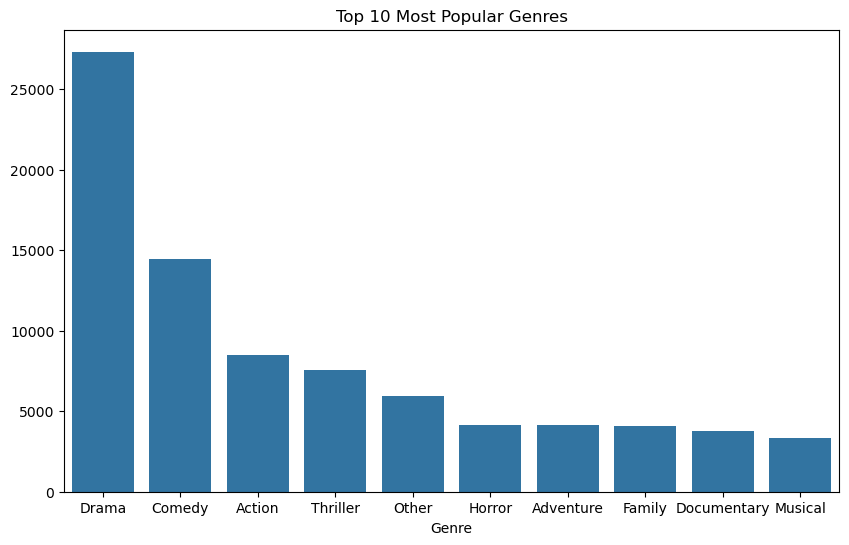

In [36]:


plt.figure(figsize=(10, 6))
genres, counts = zip(*most_common_genres)
sns.barplot(x=genres, y=counts)
plt.title('Top 10 Most Popular Genres')
plt.xlabel('Genre')

popularity score is also useful, so we should show it

Text(0, 0.5, 'Frequency')

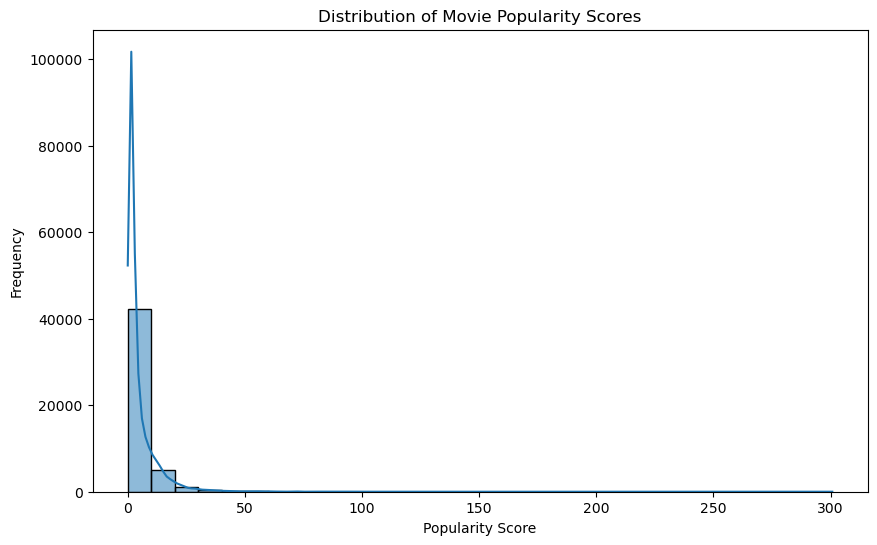

In [ ]:

plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['popularity'], bins=30, kde=True)
plt.title('Distribution of Movie popularity Scores')
plt.xlabel('popularity Score')
plt.ylabel('Frequency')

In [ ]:
df_filtered['popularity'].describe()

count    49258.000000
mean         4.964497
std          7.811990
min          0.000000
25%          1.092000
50%          2.201000
75%          5.644000
max        300.738000
Name: Popularity, dtype: float64

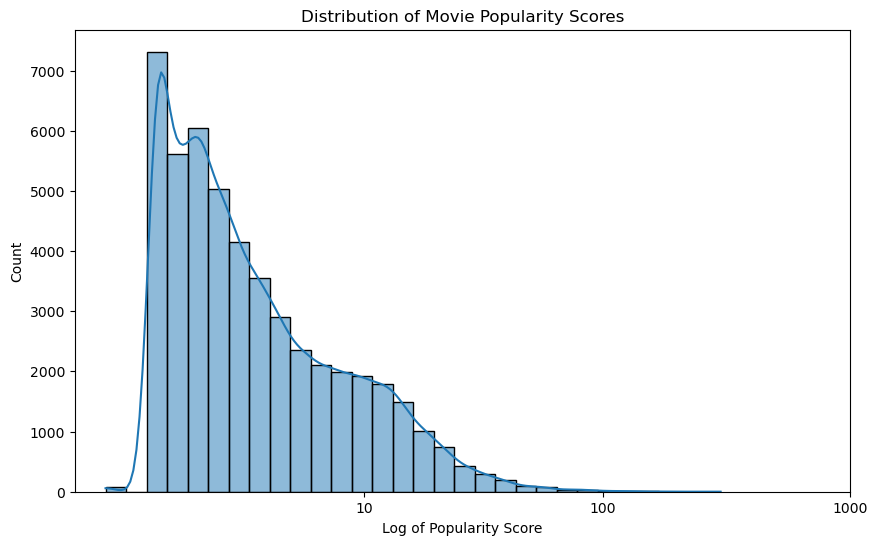

In [ ]:
# Again, let's also do it in log scale
plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(df_filtered['popularity']), bins=30, kde=True)
plt.title('Distribution of Movie popularity Scores')
plt.xlabel('Log of popularity Score')
plt.xticks(ticks=np.log1p([1e1,1e2,1e3]), labels=[f'{int(x)}' for x in [1e1,1e2,1e3]]);

In [ ]:
# Finding 95 quantile and filtering outliers
percentile_95 = df_filtered['popularity'].quantile(0.95)
print(percentile_95)
df_filtered[df_filtered['popularity'] > percentile_95] = np.nan


17.867449999999984


Text(0, 0.5, 'Frequency')

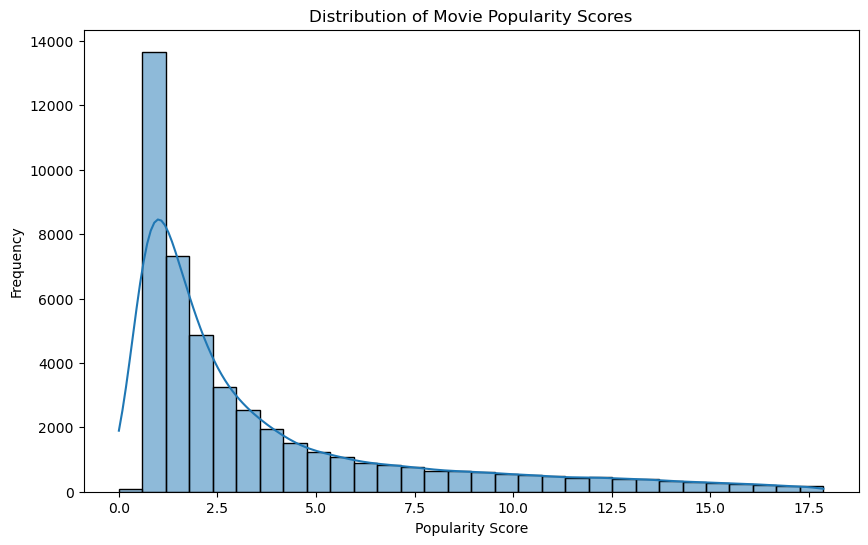

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['popularity'], bins=30, kde=True)
plt.title('Distribution of Movie popularity Scores')
plt.xlabel('popularity Score')
plt.ylabel('Frequency')

## Identifying periods in history that can have an effect in genres

For this part in our work, we try and find out if there exists a relationship between important historic periods and the genre of movies, starting off with World War I and World War II

We first plotted the amount of movies per genre in 3 different periods, WW1, WW2 and the period between wars

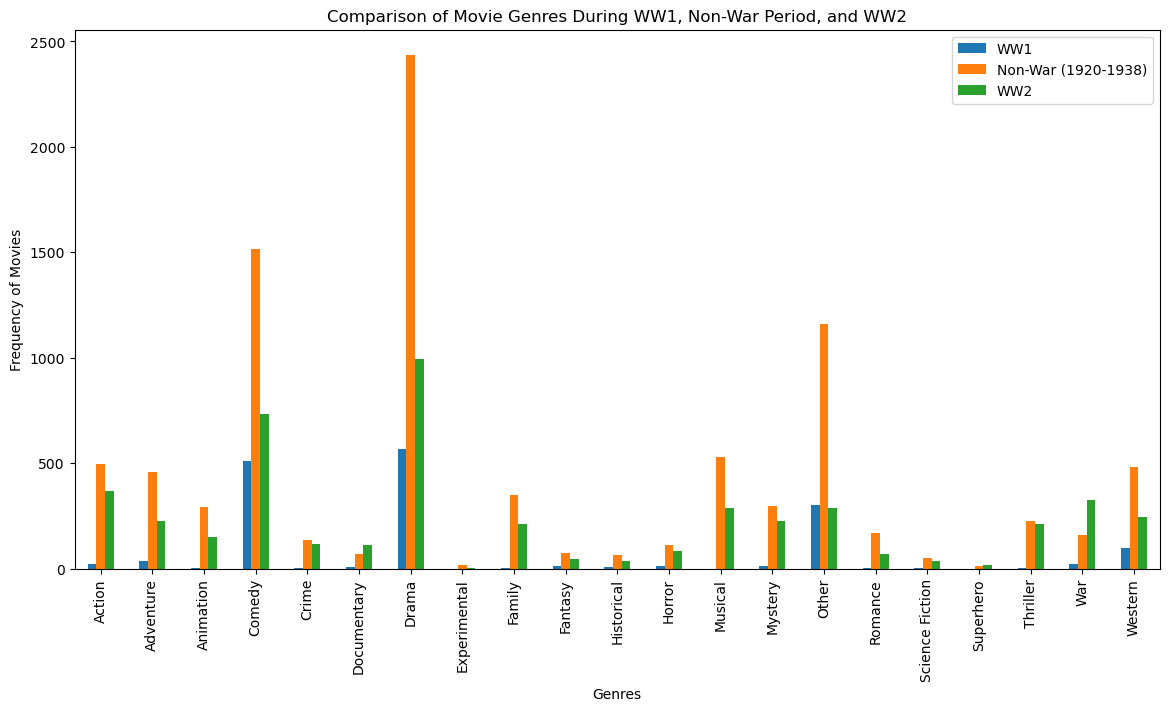

In [ ]:
# We first made dataframes per period (WW1, nonwar, WW2)
ww1_movies_df = movies_df[(movies_df['Release year'] >= 1914) & (movies_df['Release year'] <= 1918)]
ww2_movies_df = movies_df[(movies_df['Release year'] >= 1939) & (movies_df['Release year'] <= 1945)]
non_war_movies_df = movies_df[(movies_df['Release year'] >= 1920) & (movies_df['Release year'] <= 1938)]

# Then we obtained the counts for each movie genre
ww1_genre_counts = ww1_movies_df['genres'].explode().value_counts()
ww2_genre_counts = ww2_movies_df['genres'].explode().value_counts()
non_war_genre_counts = non_war_movies_df['genres'].explode().value_counts()

# And finaly we plotted all the genres with their respectime amount of movies
genre_comparison_df = pd.DataFrame({'WW1': ww1_genre_counts, 'Non-War': non_war_genre_counts, 'WW2': ww2_genre_counts}).fillna(0)
genre_comparison_df.plot(kind='bar', figsize=(14, 7))
plt.title("Comparison of genres During WW1, Non-War Period, and WW2")
plt.xlabel("Genres")
plt.ylabel("Frequency of Movies")
plt.legend(["WW1", "Non-War (1920-1938)", "WW2"])
plt.show()

To have a better understanding of the flux of each movie genre in the different periods, we plotted its relative percentage to all the genres.

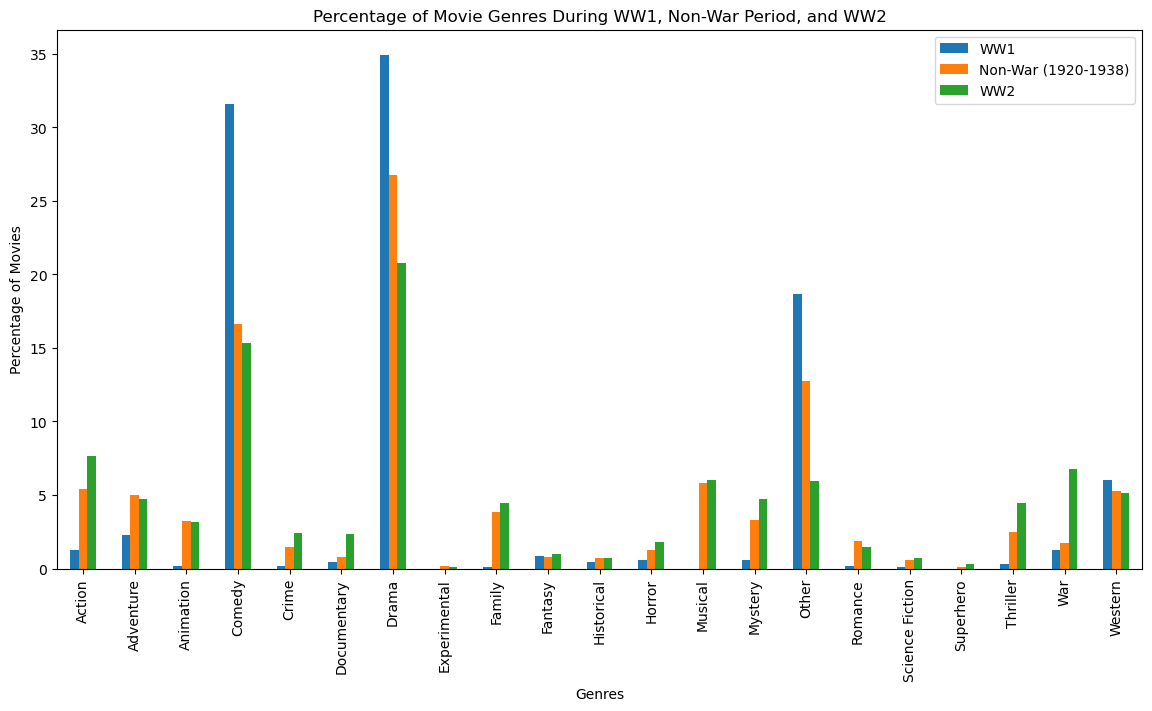

In [ ]:
# Now we repeated the steps from above but, obtained the percentages of each genre and plotted them

ww1_movies_df = movies_df[(movies_df['Release year'] >= 1914) & (movies_df['Release year'] <= 1918)]
ww2_movies_df = movies_df[(movies_df['Release year'] >= 1939) & (movies_df['Release year'] <= 1945)]
non_war_movies_df = movies_df[(movies_df['Release year'] >= 1920) & (movies_df['Release year'] <= 1938)]

ww1_genre_counts = ww1_movies_df['genres'].explode().value_counts()
ww2_genre_counts = ww2_movies_df['genres'].explode().value_counts()
non_war_genre_counts = non_war_movies_df['genres'].explode().value_counts()

# We calculated the percentages by dividung all the counts by the sum of each genre
ww1_genre_percentages = (ww1_genre_counts / ww1_genre_counts.sum()) * 100
ww2_genre_percentages = (ww2_genre_counts / ww2_genre_counts.sum()) * 100
non_war_genre_percentages = (non_war_genre_counts / non_war_genre_counts.sum()) * 100

genre_comparison_df = pd.DataFrame({
    'WW1': ww1_genre_percentages,
    'Non-War': non_war_genre_percentages,
    'WW2': ww2_genre_percentages
}).fillna(0)

genre_comparison_df.plot(kind='bar', figsize=(14, 7))
plt.title("Percentage of genres During WW1, Non-War Period, and WW2")
plt.xlabel("Genres")
plt.ylabel("Percentage of Movies")
plt.legend(["WW1", "Non-War (1920-1938)", "WW2"])
plt.show()

Because of a possible bias in the period of Non-War, we also plotted with respect to all the movies of our dataset.

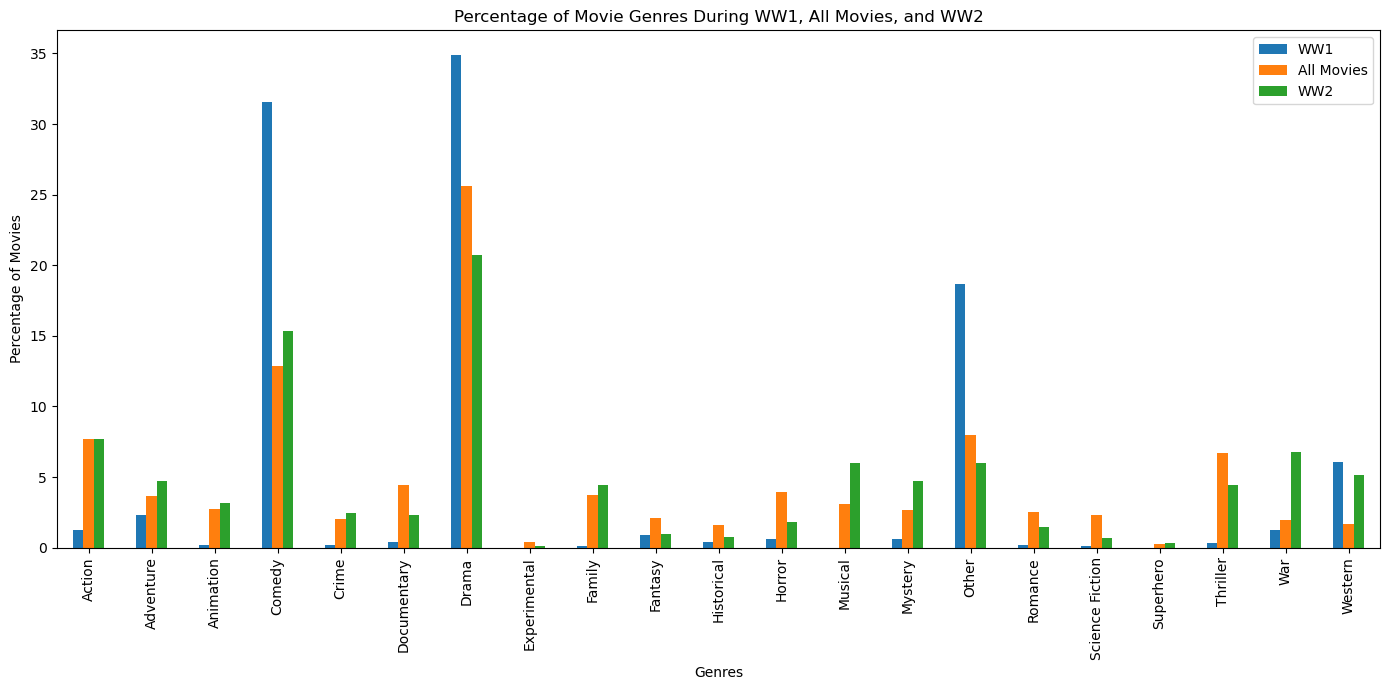

In [ ]:
#We repeated the process from above with the difference of getting all the movies instead of only movies from 1920-138

ww1_movies_df = movies_df[(movies_df['Release year'] >= 1914) & (movies_df['Release year'] <= 1918)]
ww2_movies_df = movies_df[(movies_df['Release year'] >= 1939) & (movies_df['Release year'] <= 1945)]
all_movies_df = movies_df

ww1_genre_counts = ww1_movies_df['genres'].explode().value_counts()
ww2_genre_counts = ww2_movies_df['genres'].explode().value_counts()
all_genre_counts = all_movies_df['genres'].explode().value_counts()

ww1_genre_percentages = (ww1_genre_counts / ww1_genre_counts.sum()) * 100
ww2_genre_percentages = (ww2_genre_counts / ww2_genre_counts.sum()) * 100
all_genre_percentages = (all_genre_counts / all_genre_counts.sum()) * 100

genre_comparison_percent_df = pd.DataFrame({
    'WW1': ww1_genre_percentages,
    'All Movies': all_genre_percentages,
    'WW2': ww2_genre_percentages
}).fillna(0)

genre_comparison_percent_df.plot(kind='bar', figsize=(14, 7))
plt.title("Percentage of genres During WW1, All Movies, and WW2")
plt.xlabel("Genres")
plt.ylabel("Percentage of Movies")
plt.legend(["WW1", "All Movies", "WW2"])
plt.tight_layout()
plt.show()

We now proceeded to make a similar analysis but instead of using bars to plot the different genres, we plotted all of them over eachother in a plot with an x axis representing the years and the y axis the relative percentage of each movie genre.

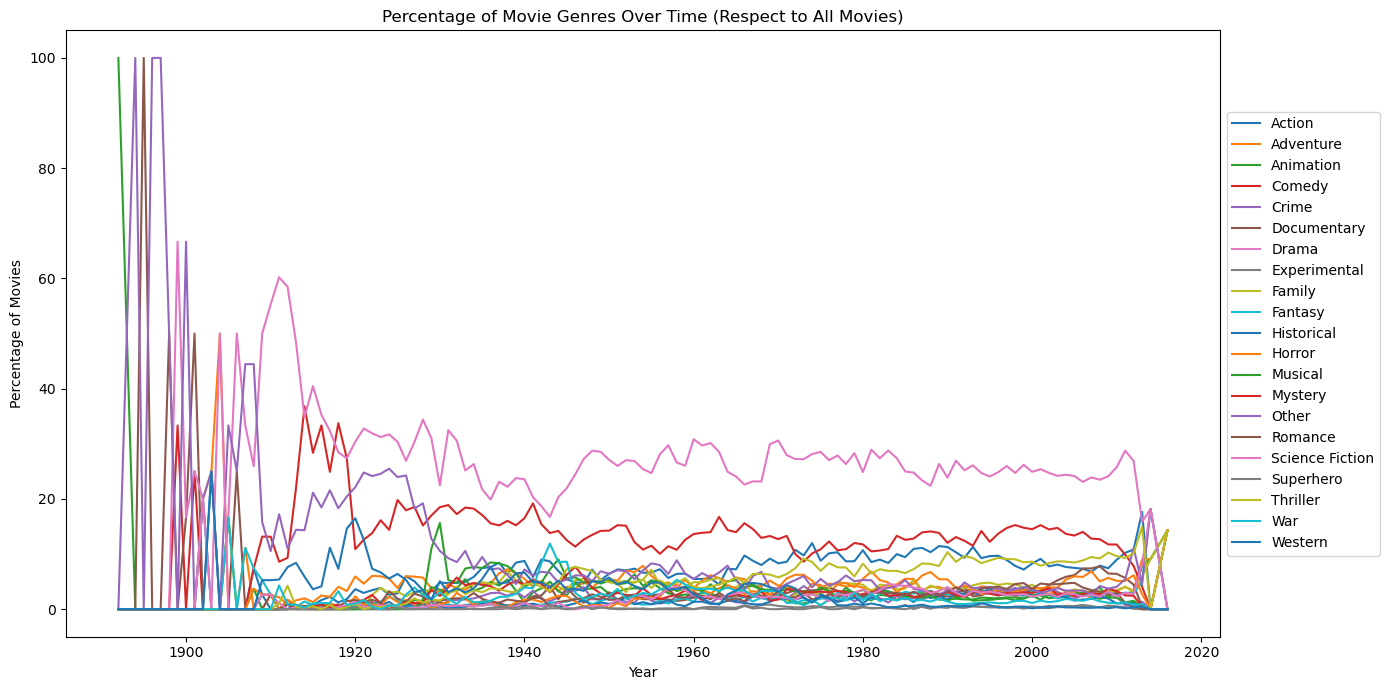

In [ ]:
# We first separate the movies by genre and get the amount for each one

movies_exploded_df = movies_df.explode('genres')
genre_counts_by_year = movies_exploded_df.groupby('Release year')['genres'].value_counts().unstack(fill_value=0)

# Then we obtained the percentage relative to all the movies for each genre
genre_percentage_by_year = genre_counts_by_year.div(genre_counts_by_year.sum(axis=1), axis=0) * 100

plt.figure(figsize=(14, 7))

for genre in genre_percentage_by_year.columns:
    plt.plot(genre_percentage_by_year.index, genre_percentage_by_year[genre], label=genre)

plt.title("Percentage of genres Over Time (Respect to All Movies)")
plt.xlabel("Year")
plt.ylabel("Percentage of Movies")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()

plt.show()

But because it is very difficult to clearly distinguish each genre, we divided the plot into 4 other plots for an easier visualization.

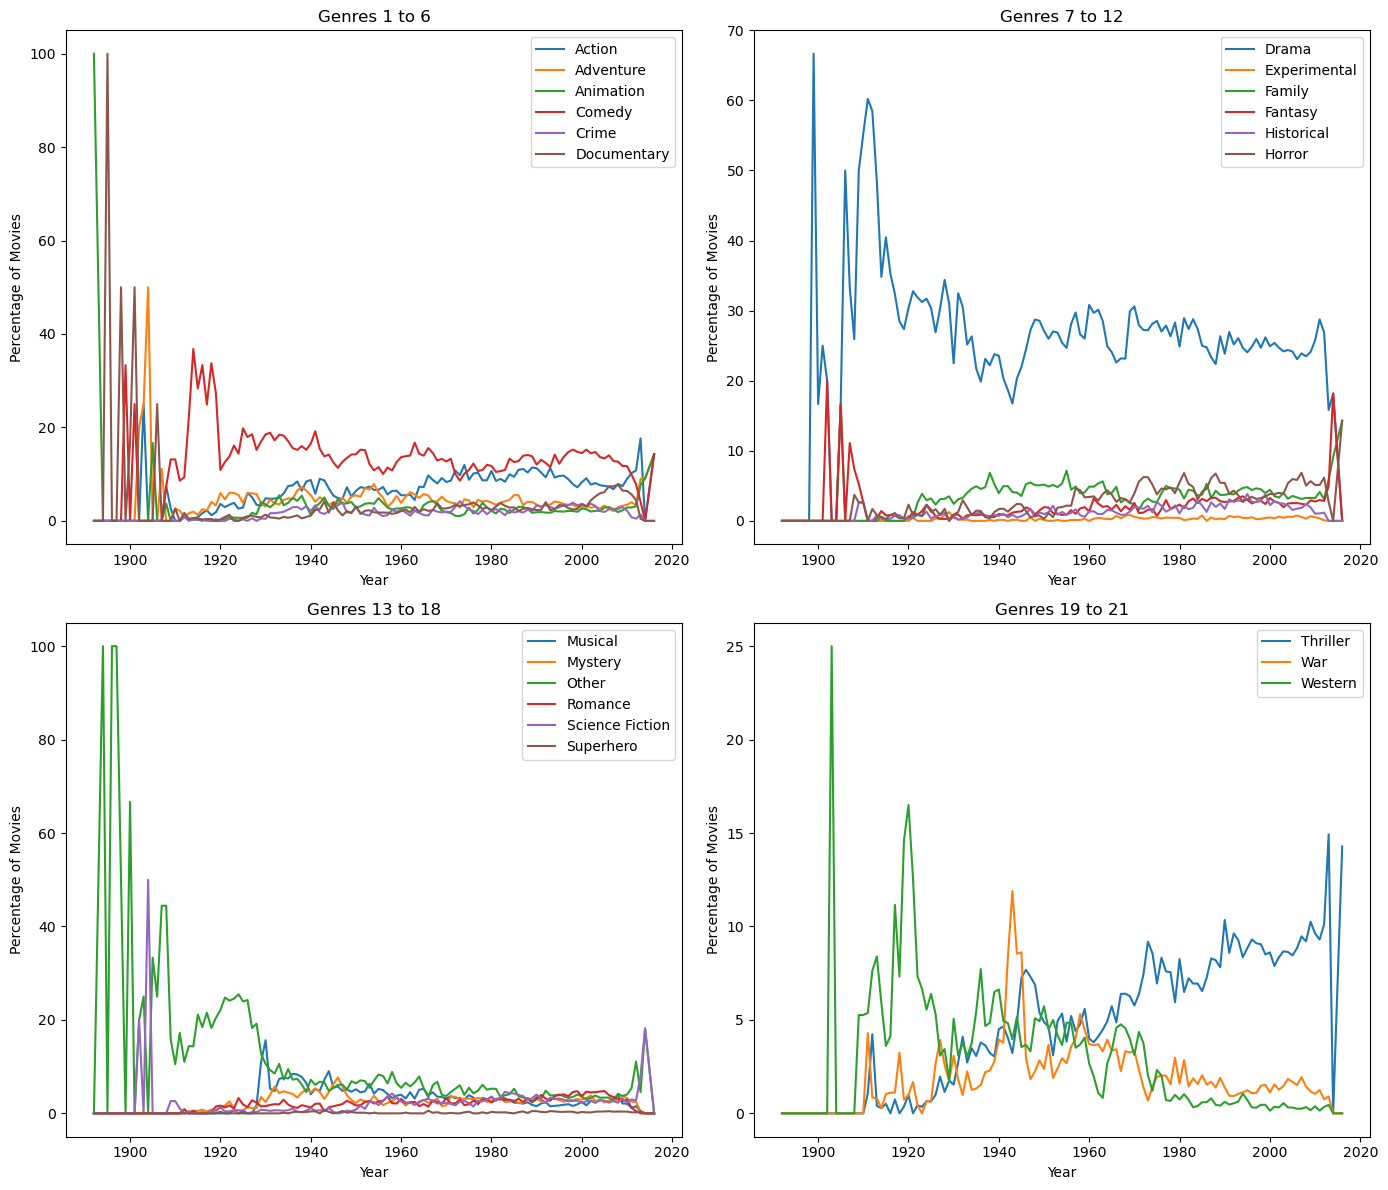

In [ ]:
#To separate the plot above into 4 parts, we followed the same process but created a 2x2 grid

movies_exploded_df = movies_df.explode('genres')
genre_counts_by_year = movies_exploded_df.groupby('Release year')['genres'].value_counts().unstack(fill_value=0)

genre_percentage_by_year = genre_counts_by_year.div(genre_counts_by_year.sum(axis=1), axis=0) * 100
genre_columns = genre_percentage_by_year.columns
num_genres = len(genre_columns)

# Here we created the 2x2 grid
nrows, ncols = 2, 2
fig, axes = plt.subplots(nrows, ncols, figsize=(14, 12))
axes = axes.flatten()
genres_per_plot = (num_genres + nrows * ncols - 1) // (nrows * ncols)  # Ceiling division

#We iterate to plot over the different parts
for i in range(nrows * ncols):
    ax = axes[i]
    start_idx = i * genres_per_plot
    end_idx = min((i + 1) * genres_per_plot, num_genres)

    for genre in genre_columns[start_idx:end_idx]:
        ax.plot(genre_percentage_by_year.index, genre_percentage_by_year[genre], label=genre)

    ax.set_title(f"Genres {start_idx + 1} to {end_idx}")
    ax.set_xlabel("Year")
    ax.set_ylabel("Percentage of Movies")
    ax.legend(loc='upper right')

plt.tight_layout()
plt.show()

From the plots we generated we could see there is some noise in the first years of our data set, and because of it it will be difficult to observe a trend or a pattern in WW1 for example. To further prove this point we will go into a deeper analysis.

First we wanted to know the number of movies per year, especially for the older dates.

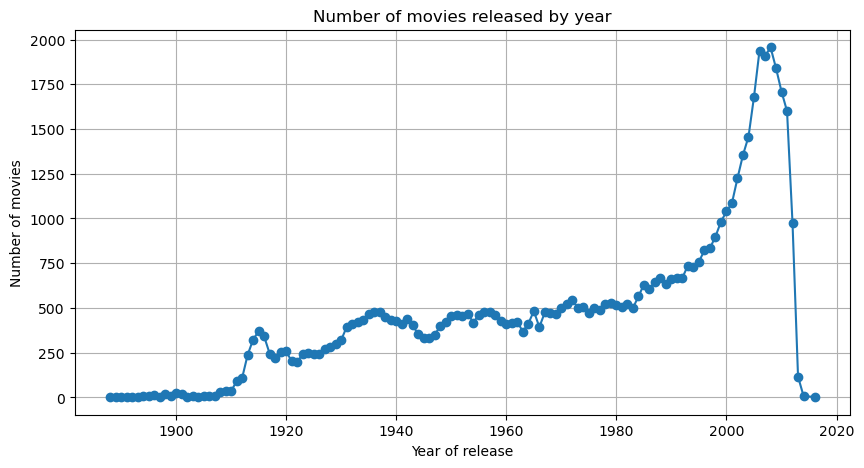

In [47]:
plt.figure(figsize=(10, 5))
plt.plot(movie_count_by_year.index, movie_count_by_year.values, marker='o')
plt.xlabel('Year of release')
plt.ylabel('Number of movies')
plt.title('Number of movies released by year')
plt.grid(True)
plt.show()

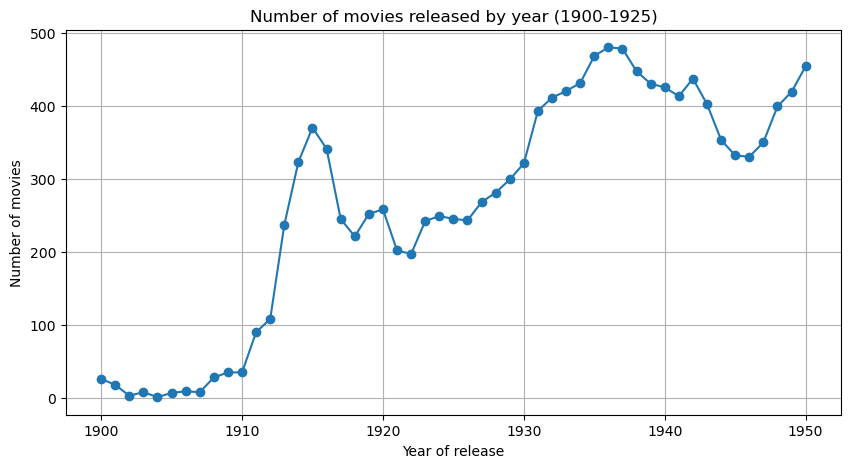

In [48]:
# We created a dataframe only for movies between 1900-1925 and repeated the steps from above
filtered_movie_count = movie_count_by_year[(movie_count_by_year.index >= 1900) & (movie_count_by_year.index <= 1950)]

plt.figure(figsize=(10, 5))
plt.plot(filtered_movie_count.index, filtered_movie_count.values, marker='o')
plt.xlabel('Year of release')
plt.ylabel('Number of movies')
plt.title('Number of movies released by year (1900-1925)')
plt.grid(True)
plt.show()

In [49]:
# Getting the amount of movies for each war
movies_1914_1919 = movie_count_by_year[(movie_count_by_year.index >= 1914) & (movie_count_by_year.index <= 1918)].sum()
movies_1939_1945 = movie_count_by_year[(movie_count_by_year.index >= 1939) & (movie_count_by_year.index <= 1945)].sum()

print(f"Number of movies from 1914 to 1919: {movies_1914_1919}")
print(f"Number of movies from 1939 to 1945: {movies_1939_1945}")

Number of movies from 1914 to 1919: 1500
Number of movies from 1939 to 1945: 2792


We can see that the amount of movies in our data set for the second world war is aproximately double the amount for the first world war. And with this information we decided to focus on WW2 instead of both.

<Figure size 1400x700 with 0 Axes>

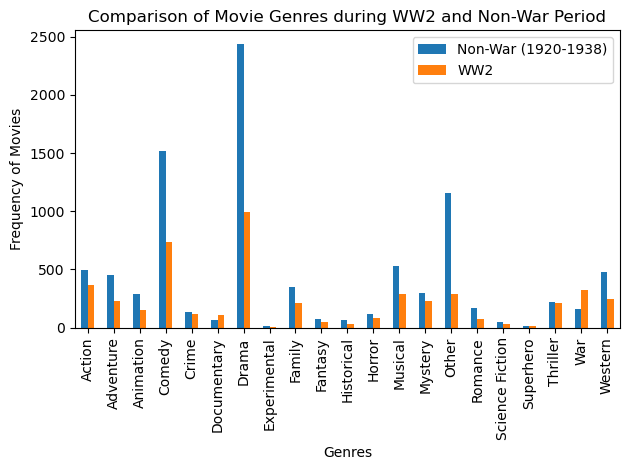

<Figure size 1400x700 with 0 Axes>

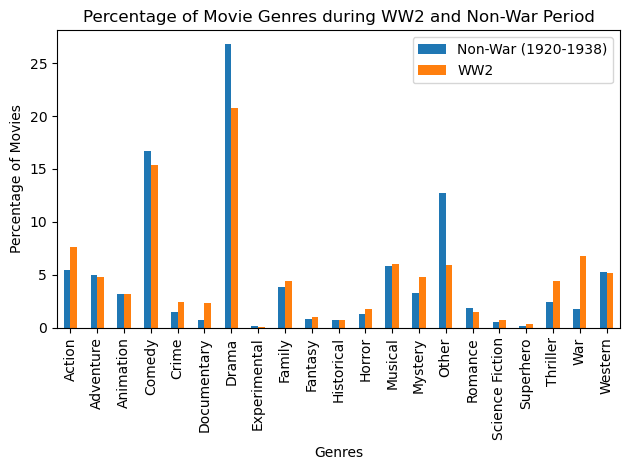

<Figure size 1400x700 with 0 Axes>

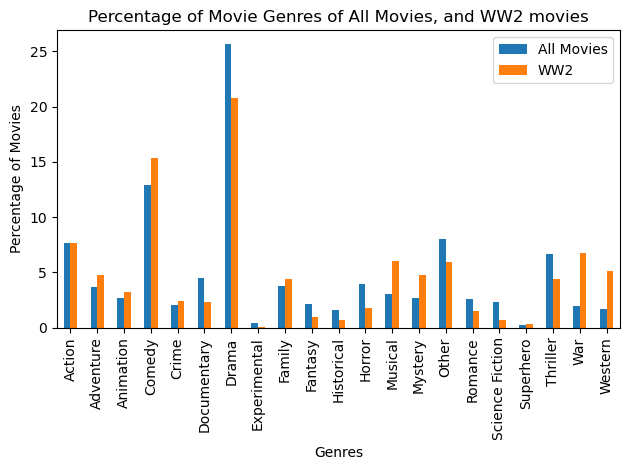

In [ ]:
# Used the same code as before but removed the part for WW1

ww2_movies_df = movies_df[(movies_df['Release year'] >= 1939) & (movies_df['Release year'] <= 1945)]
non_war_movies_df = movies_df[(movies_df['Release year'] >= 1920) & (movies_df['Release year'] <= 1938)]
all_movies_df = movies_df  # All movies in the dataset

ww2_genre_counts = ww2_movies_df['genres'].explode().value_counts()
non_war_genre_counts = non_war_movies_df['genres'].explode().value_counts()

genre_comparison_df = pd.DataFrame({
    'Non-War': non_war_genre_counts,
    'WW2': ww2_genre_counts
}).fillna(0)

plt.figure(figsize=(14, 7))
genre_comparison_df.plot(kind='bar')
plt.title("Comparison of genres during WW2 and Non-War Period")
plt.xlabel("Genres")
plt.ylabel("Frequency of Movies")
plt.legend(["Non-War (1920-1938)", "WW2"])
plt.tight_layout()
plt.show()

ww1_genre_percentages = (ww1_genre_counts / ww1_genre_counts.sum()) * 100
ww2_genre_percentages = (ww2_genre_counts / ww2_genre_counts.sum()) * 100
non_war_genre_percentages = (non_war_genre_counts / non_war_genre_counts.sum()) * 100

genre_comparison_percent_df = pd.DataFrame({
    'Non-War': non_war_genre_percentages,
    'WW2': ww2_genre_percentages
}).fillna(0)

plt.figure(figsize=(14, 7))
genre_comparison_percent_df.plot(kind='bar')
plt.title("Percentage of genres during WW2 and Non-War Period")
plt.xlabel("Genres")
plt.ylabel("Percentage of Movies")
plt.legend(["Non-War (1920-1938)", "WW2"])
plt.tight_layout()
plt.show()

all_genre_counts = all_movies_df['genres'].explode().value_counts()

ww2_genre_percentages = (ww2_genre_counts / ww2_genre_counts.sum()) * 100
all_genre_percentages = (all_genre_counts / all_genre_counts.sum()) * 100

genre_comparison_percent_all_df = pd.DataFrame({
    'All Movies': all_genre_percentages,
    'WW2': ww2_genre_percentages
}).fillna(0)

plt.figure(figsize=(14, 7))
genre_comparison_percent_all_df.plot(kind='bar')
plt.title("Percentage of genres of All Movies, and WW2 movies")
plt.xlabel("Genres")
plt.ylabel("Percentage of Movies")
plt.legend(["All Movies", "WW2"])
plt.tight_layout()
plt.show()


From the bar plot we could see were interested to dive deeper in the genres of: War, Crime, Action, Mystery and Documentary.

We left the period for WW1 marked to prove that we couldn't prove anything because of the lack of information.

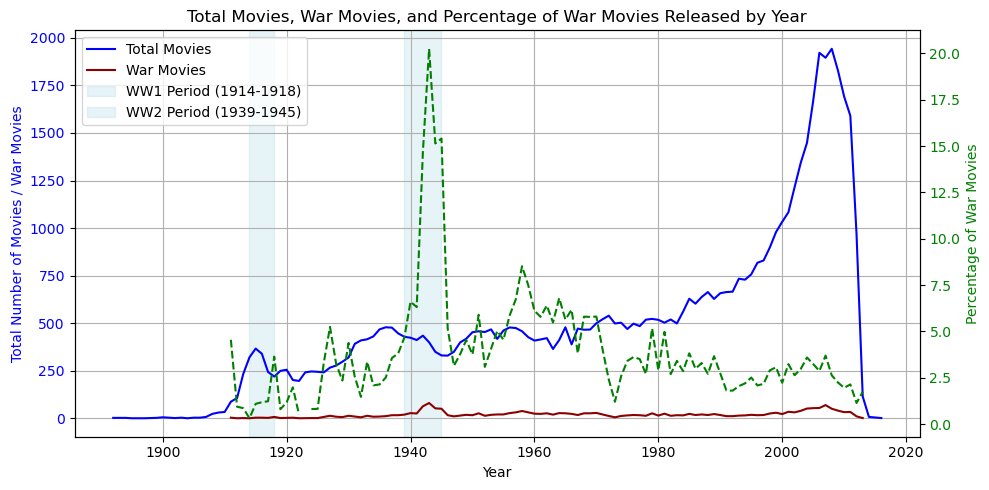

In [ ]:
# First we get only the war movies and group them by year to get the total number of movies
war_movies_df = movies_df[movies_df['genres'].apply(lambda x: 'War' in x if isinstance(x, list) else False)]
war_movie_count_by_year = war_movies_df.groupby('Release year').size()
total_movies_by_year = movies_df.groupby('Release year').size()

# Then we calculate the percentage
war_percentage_by_year = (war_movie_count_by_year / total_movies_by_year) * 100

fig, ax1 = plt.subplots(figsize=(10, 5))
ax1.plot(total_movies_by_year.index, total_movies_by_year.values, color='blue', label='Total Movies')
ax1.plot(war_movie_count_by_year.index, war_movie_count_by_year.values, color='darkred', label='War Movies')
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Number of Movies / War Movies', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(war_percentage_by_year.index, war_percentage_by_year.values, color='green', label='% War Movies', linestyle='--')
ax2.set_ylabel('Percentage of War Movies', color='green')
ax2.tick_params(axis='y', labelcolor='green')

ax1.axvspan(1914, 1918, color='lightblue', alpha=0.3, label="WW1 Period (1914-1918)")
ax1.axvspan(1939, 1945, color='lightblue', alpha=0.3, label="WW2 Period (1939-1945)")

plt.title('Total Movies, War Movies, and Percentage of War Movies Released by Year')
ax1.grid(True)
ax1.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
#Now we get the number for the percentage printed out
war_movies_df = movies_df[movies_df['genres'].apply(lambda x: 'War' in x if isinstance(x, list) else False)]

total_movies = len(movies_df)

total_war_movies = len(war_movies_df)

total_war_percentage = (total_war_movies / total_movies) * 100

ww1_movies_df = movies_df[(movies_df['Release year'] >= 1914) & (movies_df['Release year'] <= 1918)]
ww2_movies_df = movies_df[(movies_df['Release year'] >= 1939) & (movies_df['Release year'] <= 1945)]
non_war_movies_df = movies_df[(movies_df['Release year'] >= 1920) & (movies_df['Release year'] <= 1938)]

ww1_war_movies_df = ww1_movies_df[ww1_movies_df['genres'].apply(lambda x: 'War' in x if isinstance(x, list) else False)]
ww2_war_movies_df = ww2_movies_df[ww2_movies_df['genres'].apply(lambda x: 'War' in x if isinstance(x, list) else False)]
non_war_war_movies_df = non_war_movies_df[non_war_movies_df['genres'].apply(lambda x: 'War' in x if isinstance(x, list) else False)]

ww1_war_percentage = (len(ww1_war_movies_df) / len(ww1_movies_df)) * 100 if len(ww1_movies_df) > 0 else 0
ww2_war_percentage = (len(ww2_war_movies_df) / len(ww2_movies_df)) * 100 if len(ww2_movies_df) > 0 else 0
non_war_war_percentage = (len(non_war_war_movies_df) / len(non_war_movies_df)) * 100 if len(non_war_movies_df) > 0 else 0

print(f"Percentage of War Movies in the Entire Dataset: {total_war_percentage:.2f}%")
print(f"Percentage of War Movies During WW1 (1914-1918): {ww1_war_percentage:.2f}%")
print(f"Percentage of War Movies During WW2 (1939-1945): {ww2_war_percentage:.2f}%")
print(f"Percentage of War Movies During Non-War Period (1920-1938): {non_war_war_percentage:.2f}%")


Percentage of War Movies in the Entire Dataset: 3.26%
Percentage of War Movies During WW1 (1914-1918): 1.34%
Percentage of War Movies During WW2 (1939-1945): 11.61%
Percentage of War Movies During Non-War Period (1920-1938): 2.52%


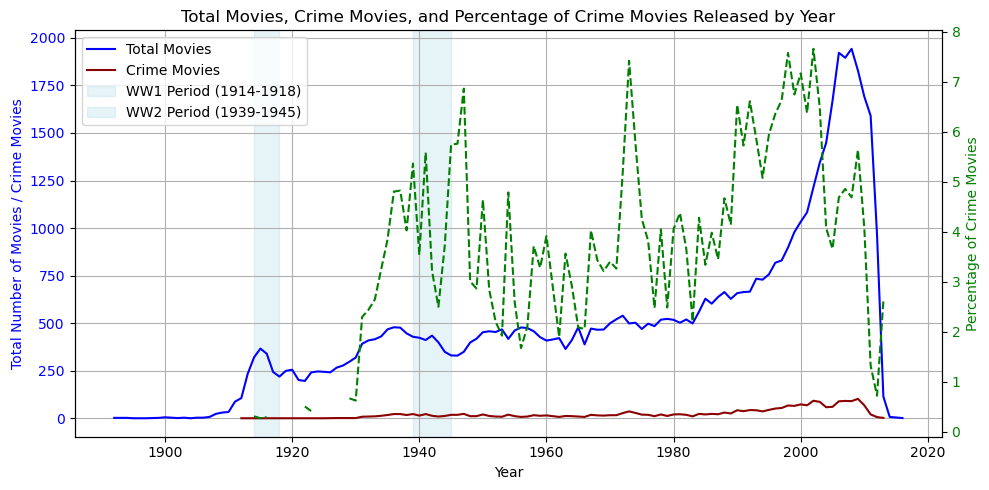

In [ ]:
#Used the same code as before but now for Crime movies
crime_movies_df = movies_df[movies_df['genres'].apply(lambda x: 'Crime' in x if isinstance(x, list) else False)]

crime_movie_count_by_year = crime_movies_df.groupby('Release year').size()
total_movies_by_year = movies_df.groupby('Release year').size()
crime_percentage_by_year = (crime_movie_count_by_year / total_movies_by_year) * 100

fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.plot(total_movies_by_year.index, total_movies_by_year.values, color='blue', label='Total Movies')
ax1.plot(crime_movie_count_by_year.index, crime_movie_count_by_year.values, color='darkred', label='Crime Movies')
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Number of Movies / Crime Movies', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(crime_percentage_by_year.index, crime_percentage_by_year.values, color='green', label='% Crime Movies', linestyle='--')
ax2.set_ylabel('Percentage of Crime Movies', color='green')
ax2.tick_params(axis='y', labelcolor='green')

ax1.axvspan(1914, 1918, color='lightblue', alpha=0.3, label="WW1 Period (1914-1918)")
ax1.axvspan(1939, 1945, color='lightblue', alpha=0.3, label="WW2 Period (1939-1945)")

plt.title('Total Movies, Crime Movies, and Percentage of Crime Movies Released by Year')
ax1.grid(True)
ax1.legend(loc='upper left')

plt.tight_layout()
plt.show()


In [ ]:
#Now we get the number for the percentage printed out
crime_movies_df = movies_df[movies_df['genres'].apply(lambda x: 'Crime' in x if isinstance(x, list) else False)]

total_movies = len(movies_df)

total_crime_movies = len(crime_movies_df)

total_crime_percentage = (total_crime_movies / total_movies) * 100

ww1_movies_df = movies_df[(movies_df['Release year'] >= 1914) & (movies_df['Release year'] <= 1918)]
ww2_movies_df = movies_df[(movies_df['Release year'] >= 1939) & (movies_df['Release year'] <= 1945)]
non_war_movies_df = movies_df[(movies_df['Release year'] >= 1920) & (movies_df['Release year'] <= 1938)]

ww1_crime_movies_df = ww1_movies_df[ww1_movies_df['genres'].apply(lambda x: 'Crime' in x if isinstance(x, list) else False)]
ww2_crime_movies_df = ww2_movies_df[ww2_movies_df['genres'].apply(lambda x: 'Crime' in x if isinstance(x, list) else False)]
non_war_crime_movies_df = non_war_movies_df[non_war_movies_df['genres'].apply(lambda x: 'Crime' in x if isinstance(x, list) else False)]

ww1_crime_percentage = (len(ww1_crime_movies_df) / len(ww1_movies_df)) * 100 if len(ww1_movies_df) > 0 else 0
ww2_crime_percentage = (len(ww2_crime_movies_df) / len(ww2_movies_df)) * 100 if len(ww2_movies_df) > 0 else 0
non_war_crime_percentage = (len(non_war_crime_movies_df) / len(non_war_movies_df)) * 100 if len(non_war_movies_df) > 0 else 0

print(f"Percentage of Crime Movies in the Entire Dataset: {total_crime_percentage:.2f}%")
print(f"Percentage of Crime Movies During WW1 (1914-1918): {ww1_crime_percentage:.2f}%")
print(f"Percentage of Crime Movies During WW2 (1939-1945): {ww2_crime_percentage:.2f}%")
print(f"Percentage of Crime Movies During Non-War Period (1920-1938): {non_war_crime_percentage:.2f}%")


Percentage of Crime Movies in the Entire Dataset: 3.36%
Percentage of Crime Movies During WW1 (1914-1918): 0.20%
Percentage of Crime Movies During WW2 (1939-1945): 4.21%
Percentage of Crime Movies During Non-War Period (1920-1938): 2.14%


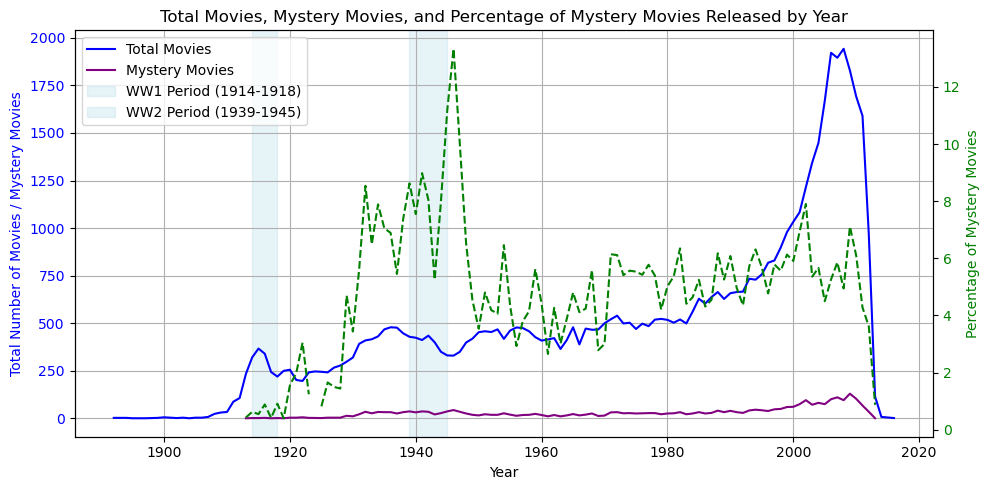

In [ ]:
#Used the same code as before but now for Mystery movies
mystery_movies_df = movies_df[movies_df['genres'].apply(lambda x: 'Mystery' in x if isinstance(x, list) else False)]
mystery_movie_count_by_year = mystery_movies_df.groupby('Release year').size()
total_movies_by_year = movies_df.groupby('Release year').size()
mystery_percentage_by_year = (mystery_movie_count_by_year / total_movies_by_year) * 100

fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.plot(total_movies_by_year.index, total_movies_by_year.values, color='blue', label='Total Movies')
ax1.plot(mystery_movie_count_by_year.index, mystery_movie_count_by_year.values, color='purple', label='Mystery Movies')
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Number of Movies / Mystery Movies', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(mystery_percentage_by_year.index, mystery_percentage_by_year.values, color='green', label='% Mystery Movies', linestyle='--')
ax2.set_ylabel('Percentage of Mystery Movies', color='green')
ax2.tick_params(axis='y', labelcolor='green')

ax1.axvspan(1914, 1918, color='lightblue', alpha=0.3, label="WW1 Period (1914-1918)")
ax1.axvspan(1939, 1945, color='lightblue', alpha=0.3, label="WW2 Period (1939-1945)")

plt.title('Total Movies, Mystery Movies, and Percentage of Mystery Movies Released by Year')
ax1.grid(True)
ax1.legend(loc='upper left')

plt.tight_layout()
plt.show()


In [ ]:
#Now we get the number for the percentage printed out
mystery_movies_df = movies_df[movies_df['genres'].apply(lambda x: 'Mystery' in x if isinstance(x, list) else False)]

total_movies = len(movies_df)

total_mystery_movies = len(mystery_movies_df)

total_mystery_percentage = (total_mystery_movies / total_movies) * 100

ww1_movies_df = movies_df[(movies_df['Release year'] >= 1914) & (movies_df['Release year'] <= 1918)]
ww2_movies_df = movies_df[(movies_df['Release year'] >= 1939) & (movies_df['Release year'] <= 1945)]
non_war_movies_df = movies_df[(movies_df['Release year'] >= 1920) & (movies_df['Release year'] <= 1938)]

ww1_mystery_movies_df = ww1_movies_df[ww1_movies_df['genres'].apply(lambda x: 'Mystery' in x if isinstance(x, list) else False)]
ww2_mystery_movies_df = ww2_movies_df[ww2_movies_df['genres'].apply(lambda x: 'Mystery' in x if isinstance(x, list) else False)]
non_war_mystery_movies_df = non_war_movies_df[non_war_movies_df['genres'].apply(lambda x: 'Mystery' in x if isinstance(x, list) else False)]

ww1_mystery_percentage = (len(ww1_mystery_movies_df) / len(ww1_movies_df)) * 100 if len(ww1_movies_df) > 0 else 0
ww2_mystery_percentage = (len(ww2_mystery_movies_df) / len(ww2_movies_df)) * 100 if len(ww2_movies_df) > 0 else 0
non_war_mystery_percentage = (len(non_war_mystery_movies_df) / len(non_war_movies_df)) * 100 if len(non_war_movies_df) > 0 else 0

print(f"Percentage of Mystery Movies in the Entire Dataset: {total_mystery_percentage:.2f}%")
print(f"Percentage of Mystery Movies During WW1 (1914-1918): {ww1_mystery_percentage:.2f}%")
print(f"Percentage of Mystery Movies During WW2 (1939-1945): {ww2_mystery_percentage:.2f}%")
print(f"Percentage of Mystery Movies During Non-War Period (1920-1938): {non_war_mystery_percentage:.2f}%")


Percentage of Mystery Movies in the Entire Dataset: 4.45%
Percentage of Mystery Movies During WW1 (1914-1918): 0.67%
Percentage of Mystery Movies During WW2 (1939-1945): 8.16%
Percentage of Mystery Movies During Non-War Period (1920-1938): 4.74%


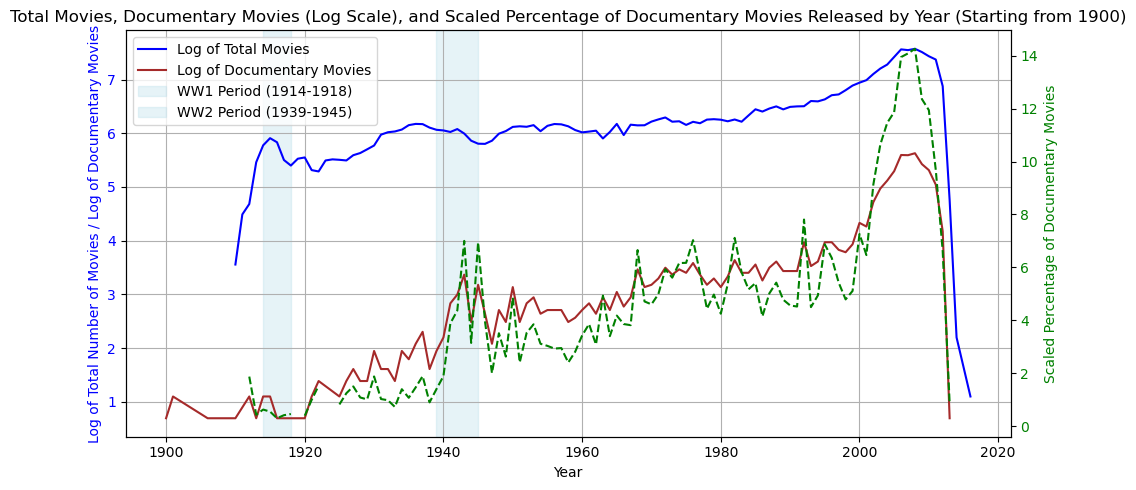

In [ ]:
#Used the same code as before but now for Documentary movies but applied log so results are better visualy

documentary_movies_df = movies_df[movies_df['genres'].apply(lambda x: 'Documentary' in x if isinstance(x, list) else False)]
documentary_movie_count_by_year = documentary_movies_df.groupby('Release year').size()
total_movies_by_year = movies_df.groupby('Release year').size()

documentary_movie_count_by_year = documentary_movie_count_by_year[documentary_movie_count_by_year.index >= 1900]
total_movies_by_year = total_movies_by_year[total_movies_by_year.index >= 1910]

documentary_percentage_by_year = (documentary_movie_count_by_year / total_movies_by_year) * 100

fig, ax1 = plt.subplots(figsize=(10, 5))

# We apply log function
ax1.plot(total_movies_by_year.index, np.log1p(total_movies_by_year.values), color='blue', label='Log of Total Movies')
ax1.plot(documentary_movie_count_by_year.index, np.log1p(documentary_movie_count_by_year.values), color='brown', label='Log of Documentary Movies')
ax1.set_xlabel('Year')
ax1.set_ylabel('Log of Total Number of Movies / Log of Documentary Movies', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(documentary_percentage_by_year.index, documentary_percentage_by_year.values, color='green', label=f'Scaled % Documentary Movies', linestyle='--')
ax2.set_ylabel('Scaled Percentage of Documentary Movies', color='green')
ax2.tick_params(axis='y', labelcolor='green')

ax1.axvspan(1914, 1918, color='lightblue', alpha=0.3, label="WW1 Period (1914-1918)")
ax1.axvspan(1939, 1945, color='lightblue', alpha=0.3, label="WW2 Period (1939-1945)")

plt.title('Total Movies, Documentary Movies (Log Scale), and Scaled Percentage of Documentary Movies Released by Year (Starting from 1900)')

ax1.grid(True)
ax1.legend(loc='upper left')

plt.tight_layout()
plt.show()


*For this plot we applied log scaling to emphazise on the brief documentary increase during WW2*

In [ ]:
#Now we get the number for the percentage printed out
documentary_movies_df = movies_df[movies_df['genres'].apply(lambda x: 'Documentary' in x if isinstance(x, list) else False)]

total_movies = len(movies_df)

total_documentary_movies = len(documentary_movies_df)

total_documentary_percentage = (total_documentary_movies / total_movies) * 100

ww1_movies_df = movies_df[(movies_df['Release year'] >= 1914) & (movies_df['Release year'] <= 1918)]
ww2_movies_df = movies_df[(movies_df['Release year'] >= 1939) & (movies_df['Release year'] <= 1945)]
non_war_movies_df = movies_df[(movies_df['Release year'] >= 1920) & (movies_df['Release year'] <= 1938)]

ww1_documentary_movies_df = ww1_movies_df[ww1_movies_df['genres'].apply(lambda x: 'Documentary' in x if isinstance(x, list) else False)]
ww2_documentary_movies_df = ww2_movies_df[ww2_movies_df['genres'].apply(lambda x: 'Documentary' in x if isinstance(x, list) else False)]
non_war_documentary_movies_df = non_war_movies_df[non_war_movies_df['genres'].apply(lambda x: 'Documentary' in x if isinstance(x, list) else False)]

ww1_documentary_percentage = (len(ww1_documentary_movies_df) / len(ww1_movies_df)) * 100 if len(ww1_movies_df) > 0 else 0
ww2_documentary_percentage = (len(ww2_documentary_movies_df) / len(ww2_movies_df)) * 100 if len(ww2_movies_df) > 0 else 0
non_war_documentary_percentage = (len(non_war_documentary_movies_df) / len(non_war_movies_df)) * 100 if len(non_war_movies_df) > 0 else 0

print(f"Percentage of Documentary Movies in the Entire Dataset: {total_documentary_percentage:.2f}%")
print(f"Percentage of Documentary Movies During WW1 (1914-1918): {ww1_documentary_percentage:.2f}%")
print(f"Percentage of Documentary Movies During WW2 (1939-1945): {ww2_documentary_percentage:.2f}%")
print(f"Percentage of Documentary Movies During Non-War Period (1920-1938): {non_war_documentary_percentage:.2f}%")


Percentage of Documentary Movies in the Entire Dataset: 7.38%
Percentage of Documentary Movies During WW1 (1914-1918): 0.47%
Percentage of Documentary Movies During WW2 (1939-1945): 3.99%
Percentage of Documentary Movies During Non-War Period (1920-1938): 1.09%


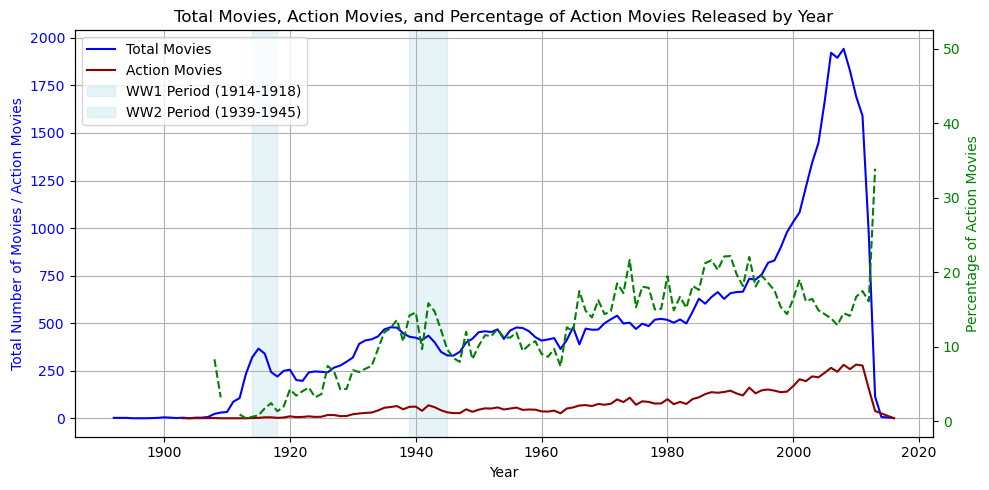

In [ ]:
#Used the same code as before but now for Action movies
action_movies_df = movies_df[movies_df['genres'].apply(lambda x: 'Action' in x if isinstance(x, list) else False)]

action_movie_count_by_year = action_movies_df.groupby('Release year').size()
total_movies_by_year = movies_df.groupby('Release year').size()
action_percentage_by_year = (action_movie_count_by_year / total_movies_by_year) * 100

fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.plot(total_movies_by_year.index, total_movies_by_year.values, color='blue', label='Total Movies')
ax1.plot(action_movie_count_by_year.index, action_movie_count_by_year.values, color='darkred', label='Action Movies')
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Number of Movies / Action Movies', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(action_percentage_by_year.index, action_percentage_by_year.values, color='green', label='% Action Movies', linestyle='--')
ax2.set_ylabel('Percentage of Action Movies', color='green')
ax2.tick_params(axis='y', labelcolor='green')

ax1.axvspan(1914, 1918, color='lightblue', alpha=0.3, label="WW1 Period (1914-1918)")
ax1.axvspan(1939, 1945, color='lightblue', alpha=0.3, label="WW2 Period (1939-1945)")

plt.title('Total Movies, Action Movies, and Percentage of Action Movies Released by Year')
ax1.grid(True)
ax1.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
#Now we get the number for the percentage printed out
action_movies_df = movies_df[movies_df['genres'].apply(lambda x: 'Action' in x if isinstance(x, list) else False)]

total_movies = len(movies_df)

total_action_movies = len(action_movies_df)

total_action_percentage = (total_action_movies / total_movies) * 100

ww1_movies_df = movies_df[(movies_df['Release year'] >= 1914) & (movies_df['Release year'] <= 1918)]
ww2_movies_df = movies_df[(movies_df['Release year'] >= 1939) & (movies_df['Release year'] <= 1945)]
non_war_movies_df = movies_df[(movies_df['Release year'] >= 1920) & (movies_df['Release year'] <= 1938)]

ww1_action_movies_df = ww1_movies_df[ww1_movies_df['genres'].apply(lambda x: 'Action' in x if isinstance(x, list) else False)]
ww2_action_movies_df = ww2_movies_df[ww2_movies_df['genres'].apply(lambda x: 'Action' in x if isinstance(x, list) else False)]
non_war_action_movies_df = non_war_movies_df[non_war_movies_df['genres'].apply(lambda x: 'Action' in x if isinstance(x, list) else False)]

ww1_action_percentage = (len(ww1_action_movies_df) / len(ww1_movies_df)) * 100 if len(ww1_movies_df) > 0 else 0
ww2_action_percentage = (len(ww2_action_movies_df) / len(ww2_movies_df)) * 100 if len(ww2_movies_df) > 0 else 0
non_war_action_percentage = (len(non_war_action_movies_df) / len(non_war_movies_df)) * 100 if len(non_war_movies_df) > 0 else 0

print(f"Percentage of Action Movies in the Entire Dataset: {total_action_percentage:.2f}%")
print(f"Percentage of Action Movies During WW1 (1914-1918): {ww1_action_percentage:.2f}%")
print(f"Percentage of Action Movies During WW2 (1939-1945): {ww2_action_percentage:.2f}%")
print(f"Percentage of Action Movies During Non-War Period (1920-1938): {non_war_action_percentage:.2f}%")


Percentage of Action Movies in the Entire Dataset: 12.74%
Percentage of Action Movies During WW1 (1914-1918): 1.34%
Percentage of Action Movies During WW2 (1939-1945): 13.16%
Percentage of Action Movies During Non-War Period (1920-1938): 7.82%


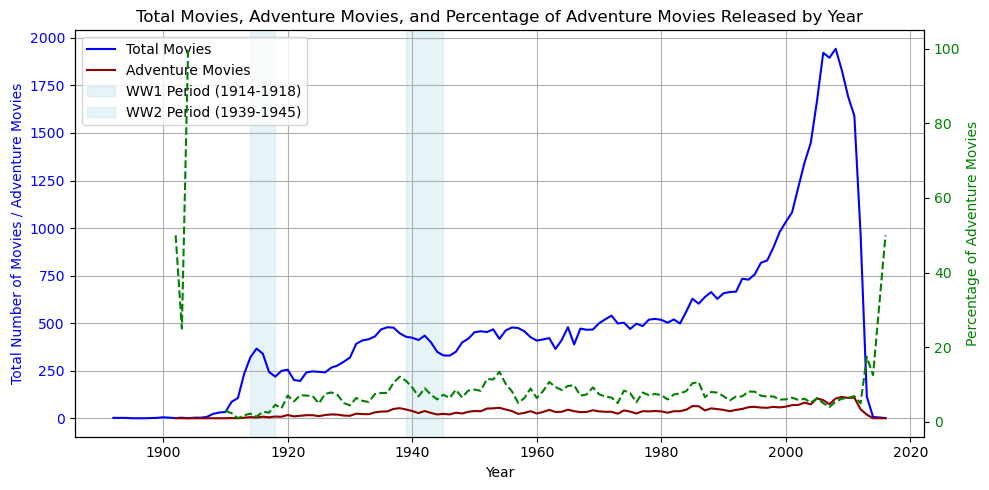

In [ ]:
#Used the same code as before but now for Adventure movies

adventure_movies_df = movies_df[movies_df['genres'].apply(lambda x: 'Adventure' in x if isinstance(x, list) else False)]
adventure_movie_count_by_year = adventure_movies_df.groupby('Release year').size()
total_movies_by_year = movies_df.groupby('Release year').size()

adventure_percentage_by_year = (adventure_movie_count_by_year / total_movies_by_year) * 100

fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.plot(total_movies_by_year.index, total_movies_by_year.values, color='blue', label='Total Movies')
ax1.plot(adventure_movie_count_by_year.index, adventure_movie_count_by_year.values, color='darkred', label='Adventure Movies')
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Number of Movies / Adventure Movies', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(adventure_percentage_by_year.index, adventure_percentage_by_year.values, color='green', label='% Adventure Movies', linestyle='--')
ax2.set_ylabel('Percentage of Adventure Movies', color='green')
ax2.tick_params(axis='y', labelcolor='green')

ax1.axvspan(1914, 1918, color='lightblue', alpha=0.3, label="WW1 Period (1914-1918)")
ax1.axvspan(1939, 1945, color='lightblue', alpha=0.3, label="WW2 Period (1939-1945)")

plt.title('Total Movies, Adventure Movies, and Percentage of Adventure Movies Released by Year')

ax1.grid(True)

ax1.legend(loc='upper left')


plt.tight_layout()
plt.show()


In [ ]:
#Now we get the number for the percentage printed out
adventure_movies_df = movies_df[movies_df['genres'].apply(lambda x: 'Adventure' in x if isinstance(x, list) else False)]

total_movies = len(movies_df)

total_adventure_movies = len(adventure_movies_df)

total_adventure_percentage = (total_adventure_movies / total_movies) * 100

ww1_movies_df = movies_df[(movies_df['Release year'] >= 1914) & (movies_df['Release year'] <= 1918)]
ww2_movies_df = movies_df[(movies_df['Release year'] >= 1939) & (movies_df['Release year'] <= 1945)]
non_war_movies_df = movies_df[(movies_df['Release year'] >= 1920) & (movies_df['Release year'] <= 1938)]

ww1_adventure_movies_df = ww1_movies_df[ww1_movies_df['genres'].apply(lambda x: 'Adventure' in x if isinstance(x, list) else False)]
ww2_adventure_movies_df = ww2_movies_df[ww2_movies_df['genres'].apply(lambda x: 'Adventure' in x if isinstance(x, list) else False)]
non_war_adventure_movies_df = non_war_movies_df[non_war_movies_df['genres'].apply(lambda x: 'Adventure' in x if isinstance(x, list) else False)]

ww1_adventure_percentage = (len(ww1_adventure_movies_df) / len(ww1_movies_df)) * 100 if len(ww1_movies_df) > 0 else 0
ww2_adventure_percentage = (len(ww2_adventure_movies_df) / len(ww2_movies_df)) * 100 if len(ww2_movies_df) > 0 else 0
non_war_adventure_percentage = (len(non_war_adventure_movies_df) / len(non_war_movies_df)) * 100 if len(non_war_movies_df) > 0 else 0

print(f"Percentage of Adventure Movies in the Entire Dataset: {total_adventure_percentage:.2f}%")
print(f"Percentage of Adventure Movies During WW1 (1914-1918): {ww1_adventure_percentage:.2f}%")
print(f"Percentage of Adventure Movies During WW2 (1939-1945): {ww2_adventure_percentage:.2f}%")
print(f"Percentage of Adventure Movies During Non-War Period (1920-1938): {non_war_adventure_percentage:.2f}%")


Percentage of Adventure Movies in the Entire Dataset: 6.09%
Percentage of Adventure Movies During WW1 (1914-1918): 2.48%
Percentage of Adventure Movies During WW2 (1939-1945): 8.16%
Percentage of Adventure Movies During Non-War Period (1920-1938): 7.22%


To complement our analysis we divided our previous research into countries that were involved in war and weren't

We also took into account the number of movies for each country and seeing the United States has a considerable amount of advantage, we will be focusing mainly in the United States.

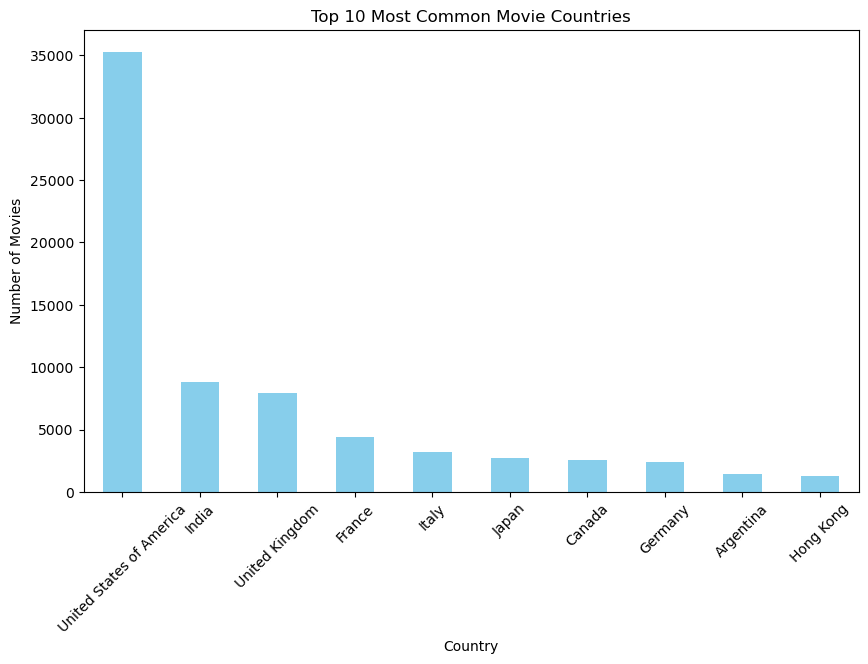

In [63]:
# To see the dispersion of our countries we loaded them into a list, counted them and proceeded to plot them
countries_list = [country for sublist in movies_df['Movie countries'].dropna() for country in sublist]
country_counts = pd.Series(countries_list).value_counts()

top_countries = country_counts.head(10)

plt.figure(figsize=(10, 6))
top_countries.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Common Movie Countries')
plt.xlabel('Country')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

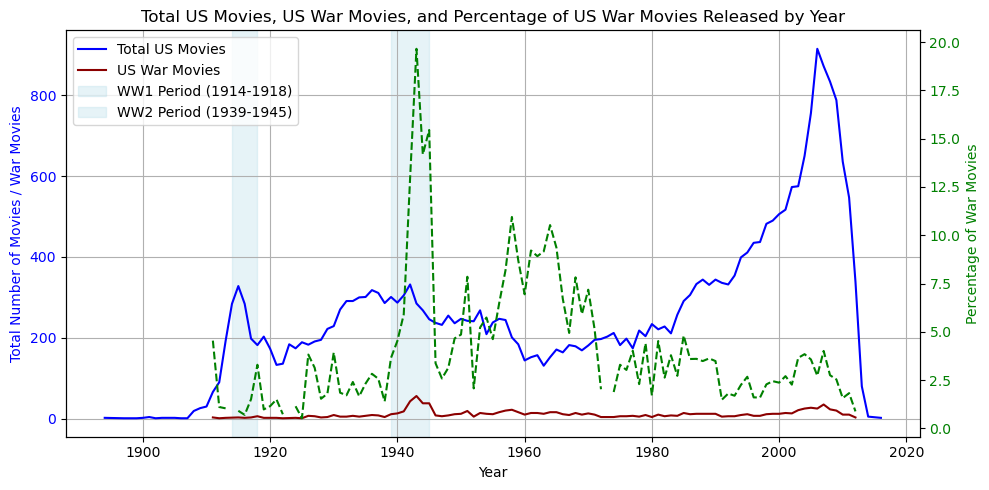

In [ ]:
# For this analyisis the extra step is obtaining only movies from the US
us_movies_df = movies_df[movies_df['Movie countries'].apply(lambda x: 'United States of America' in x if isinstance(x, list) else False)]

war_movies_us_df = us_movies_df[us_movies_df['genres'].apply(lambda x: 'War' in x if isinstance(x, list) else False)]
war_movie_count_by_year = war_movies_us_df.groupby('Release year').size()
total_movies_by_year = us_movies_df.groupby('Release year').size()
war_percentage_by_year = (war_movie_count_by_year / total_movies_by_year) * 100

fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.plot(total_movies_by_year.index, total_movies_by_year.values, color='blue', label='Total US Movies')
ax1.plot(war_movie_count_by_year.index, war_movie_count_by_year.values, color='darkred', label='US War Movies')
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Number of Movies / War Movies', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(war_percentage_by_year.index, war_percentage_by_year.values, color='green', label='% US War Movies', linestyle='--')
ax2.set_ylabel('Percentage of War Movies', color='green')
ax2.tick_params(axis='y', labelcolor='green')

ax1.axvspan(1914, 1918, color='lightblue', alpha=0.3, label="WW1 Period (1914-1918)")
ax1.axvspan(1939, 1945, color='lightblue', alpha=0.3, label="WW2 Period (1939-1945)")

plt.title('Total US Movies, US War Movies, and Percentage of US War Movies Released by Year')

ax1.grid(True)
ax1.legend(loc='upper left')

plt.tight_layout()
plt.show()

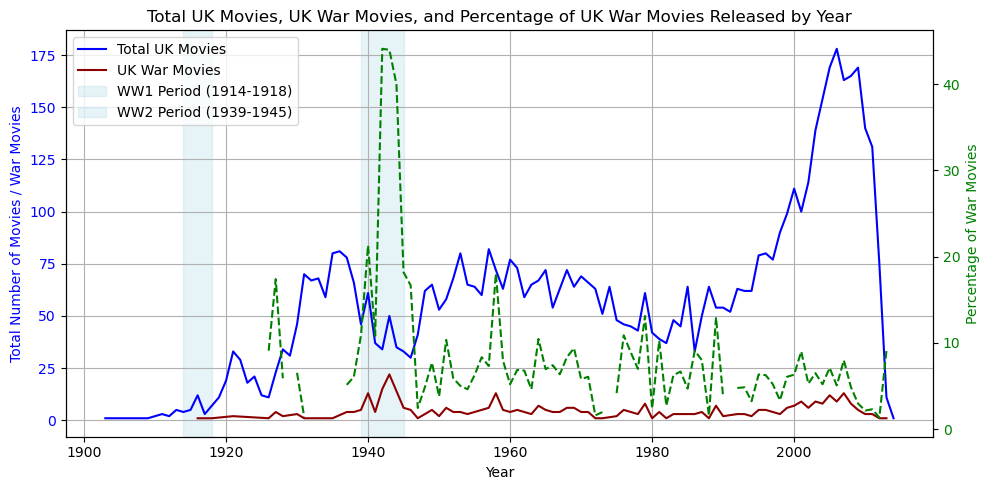

In [ ]:
# Similar to the previous plot but replacing the US for the UK
uk_movies_df = movies_df[movies_df['Movie countries'].apply(lambda x: 'United Kingdom' in x if isinstance(x, list) else False)]

war_movies_uk_df = uk_movies_df[uk_movies_df['genres'].apply(lambda x: 'War' in x if isinstance(x, list) else False)]
war_movie_count_by_year = war_movies_uk_df.groupby('Release year').size()
total_movies_by_year = uk_movies_df.groupby('Release year').size()
war_percentage_by_year = (war_movie_count_by_year / total_movies_by_year) * 100

fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.plot(total_movies_by_year.index, total_movies_by_year.values, color='blue', label='Total UK Movies')
ax1.plot(war_movie_count_by_year.index, war_movie_count_by_year.values, color='darkred', label='UK War Movies')
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Number of Movies / War Movies', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(war_percentage_by_year.index, war_percentage_by_year.values, color='green', label='% UK War Movies', linestyle='--')
ax2.set_ylabel('Percentage of War Movies', color='green')
ax2.tick_params(axis='y', labelcolor='green')

ax1.axvspan(1914, 1918, color='lightblue', alpha=0.3, label="WW1 Period (1914-1918)")
ax1.axvspan(1939, 1945, color='lightblue', alpha=0.3, label="WW2 Period (1939-1945)")

plt.title('Total UK Movies, UK War Movies, and Percentage of UK War Movies Released by Year')

ax1.grid(True)
ax1.legend(loc='upper left')

plt.tight_layout()
plt.show()


Because germany went by different names, we wanted to see if there were more names for germany in our dataset we obtained all the unique names for countries in our dataset and asked chatgpt to list us all the ones that related to germany.

In [66]:
#Print all the different countries so chatGPT will be able to tell us the different names for the Soviet Union and Germany
unique_countries = pd.Series([country for sublist in movies_df['Movie countries'].dropna() for country in sublist]).unique()
print(unique_countries)

['United States of America' 'Norway' 'United Kingdom' 'Germany'
 'South Africa' 'Argentina' 'Japan' 'Turkey' 'German Democratic Republic'
 'Soviet Union' 'France' 'Italy' 'India' 'New Zealand' 'Mexico'
 'Australia' 'Hong Kong' 'Netherlands' 'Denmark' 'Sweden' 'Canada'
 'Brazil' 'Switzerland' 'Poland' 'Spain' 'South Korea' 'Hungary'
 'West Germany' 'Pakistan' 'Yugoslavia' 'Algeria' 'Nepal' 'Kenya'
 'England' 'Finland' 'Ireland' 'China' 'Austria' 'Philippines' 'Romania'
 'Slovakia' 'Czech Republic' 'Portugal' 'Egypt' 'Czechoslovakia'
 'Northern Ireland' 'Israel' 'Iceland' 'Indonesia' 'Belgium' 'Greece'
 'Iraq' 'Republic of Macedonia' 'Russia' 'Taiwan' 'Lebanon' 'Iran'
 'Bosnia and Herzegovina' 'Croatia' 'Malaysia' 'Uzbekistan' 'Nazi Germany'
 'Weimar Republic' 'Morocco' 'Puerto Rico' 'Luxembourg' 'Tunisia'
 'Albania' 'Cambodia' 'Thailand' 'Estonia' 'Trinidad and Tobago' 'Chile'
 'Scotland' 'Venezuela' 'Vietnam' 'Sri Lanka' 'Singapore' 'Senegal'
 'Colombia' 'Bangladesh' 'Mali' 'Bulgaria' 

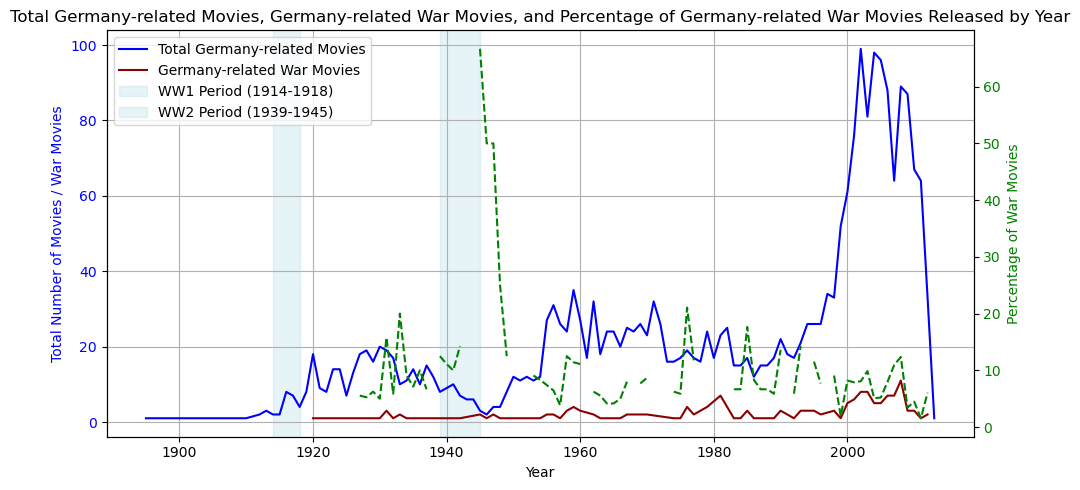

In [ ]:
# Almost the same process than with the US and the UK but because Germany had different names during the war we asked chatGPT to give us the different names for Germany
germany_related = ['Germany', 'German Democratic Republic', 'West Germany', 'Nazi Germany']

germany_movies_df = movies_df[movies_df['Movie countries'].apply(lambda x: any(country in germany_related for country in x) if isinstance(x, list) else False)]
war_movies_germany_df = germany_movies_df[germany_movies_df['genres'].apply(lambda x: 'War' in x if isinstance(x, list) else False)]
war_movie_count_by_year = war_movies_germany_df.groupby('Release year').size()
total_movies_by_year = germany_movies_df.groupby('Release year').size()
war_percentage_by_year = (war_movie_count_by_year / total_movies_by_year) * 100

fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.plot(total_movies_by_year.index, total_movies_by_year.values, color='blue', label='Total Germany-related Movies')
ax1.plot(war_movie_count_by_year.index, war_movie_count_by_year.values, color='darkred', label='Germany-related War Movies')
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Number of Movies / War Movies', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(war_percentage_by_year.index, war_percentage_by_year.values, color='green', label='% Germany-related War Movies', linestyle='--')
ax2.set_ylabel('Percentage of War Movies', color='green')
ax2.tick_params(axis='y', labelcolor='green')

ax1.axvspan(1914, 1918, color='lightblue', alpha=0.3, label="WW1 Period (1914-1918)")
ax1.axvspan(1939, 1945, color='lightblue', alpha=0.3, label="WW2 Period (1939-1945)")

plt.title('Total Germany-related Movies, Germany-related War Movies, and Percentage of Germany-related War Movies Released by Year')

ax1.grid(True)

ax1.legend(loc='upper left')

plt.tight_layout()
plt.show()


We can clearly see that the second world war was the period were war movies had the biggest percentages, and it becomes clearer for countries directly involved in war, but now we will use the example of India who has a large amount of data but wasn't directly involved in the war.

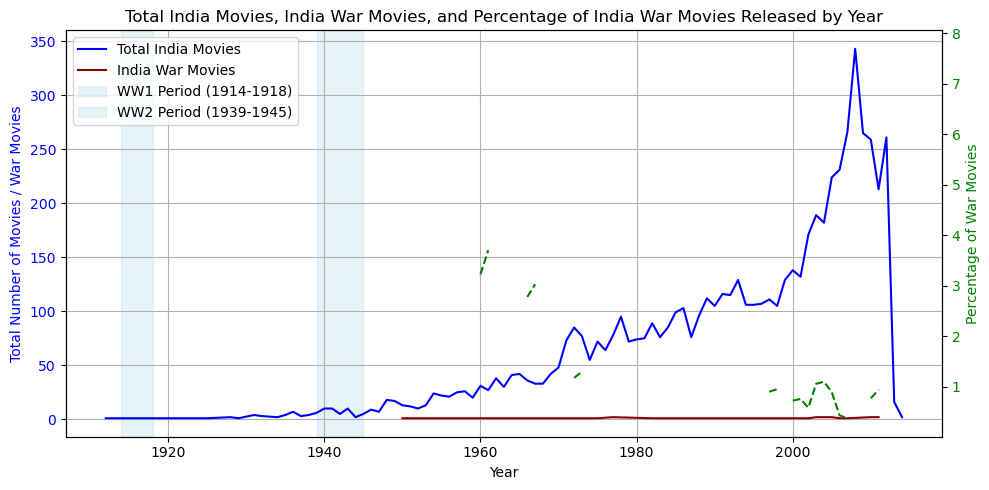

In [ ]:
india_movies_df = movies_df[movies_df['Movie countries'].apply(lambda x: 'India' in x if isinstance(x, list) else False)]

war_movies_india_df = india_movies_df[india_movies_df['genres'].apply(lambda x: 'War' in x if isinstance(x, list) else False)]

war_movie_count_by_year = war_movies_india_df.groupby('Release year').size()

total_movies_by_year = india_movies_df.groupby('Release year').size()

war_percentage_by_year = (war_movie_count_by_year / total_movies_by_year) * 100

fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.plot(total_movies_by_year.index, total_movies_by_year.values, color='blue', label='Total India Movies')
ax1.plot(war_movie_count_by_year.index, war_movie_count_by_year.values, color='darkred', label='India War Movies')
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Number of Movies / War Movies', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(war_percentage_by_year.index, war_percentage_by_year.values, color='green', label='% India War Movies', linestyle='--')
ax2.set_ylabel('Percentage of War Movies', color='green')
ax2.tick_params(axis='y', labelcolor='green')

ax1.axvspan(1914, 1918, color='lightblue', alpha=0.3, label="WW1 Period (1914-1918)")
ax1.axvspan(1939, 1945, color='lightblue', alpha=0.3, label="WW2 Period (1939-1945)")

plt.title('Total India Movies, India War Movies, and Percentage of India War Movies Released by Year')

ax1.grid(True)

ax1.legend(loc='upper left')

plt.tight_layout()
plt.show()


Although the number of movies is considerably low, India over the whole dataset has rarely a war movie.

The next event we analyzed is the Space Race during the cold war, especially its influence in Sci-Fi movies  

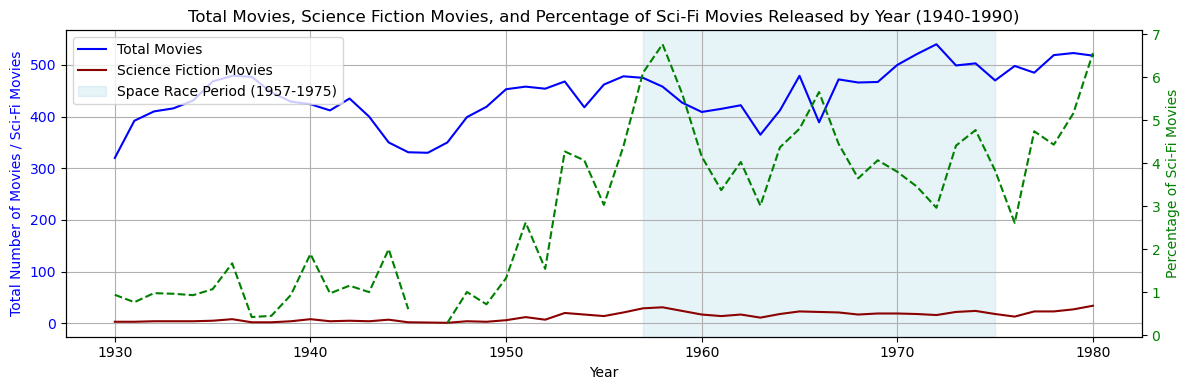

In [ ]:
# This code is very similar to previous ones but with the difference of changing the period for our plot and highlighting the space race instead
movies_df['genres'] = movies_df['genres'].apply(lambda x: eval(x) if isinstance(x, str) else x)

sci_fi_movies_df = movies_df[movies_df['genres'].apply(lambda x: 'Science Fiction' in x if isinstance(x, list) else False)]

sci_fi_movie_count_by_year = sci_fi_movies_df.groupby('Release year').size()

total_movies_by_year = movies_df.groupby('Release year').size()

sci_fi_percentage_by_year = (sci_fi_movie_count_by_year / total_movies_by_year) * 100

start_year, end_year = 1930, 1980
sci_fi_movie_count_by_year = sci_fi_movie_count_by_year[(sci_fi_movie_count_by_year.index >= start_year) & (sci_fi_movie_count_by_year.index <= end_year)]
total_movies_by_year = total_movies_by_year[(total_movies_by_year.index >= start_year) & (total_movies_by_year.index <= end_year)]
sci_fi_percentage_by_year = sci_fi_percentage_by_year[(sci_fi_percentage_by_year.index >= start_year) & (sci_fi_percentage_by_year.index <= end_year)]

fig, ax1 = plt.subplots(figsize=(12, 4))

ax1.plot(total_movies_by_year.index, total_movies_by_year.values, color='blue', label='Total Movies')
ax1.plot(sci_fi_movie_count_by_year.index, sci_fi_movie_count_by_year.values, color='darkred', label='Science Fiction Movies')
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Number of Movies / Sci-Fi Movies', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(sci_fi_percentage_by_year.index, sci_fi_percentage_by_year.values, color='green', label='% Sci-Fi Movies', linestyle='--')
ax2.set_ylabel('Percentage of Sci-Fi Movies', color='green')
ax2.tick_params(axis='y', labelcolor='green')

ax1.axvspan(1957, 1975, color='lightblue', alpha=0.3, label="Space Race Period (1957-1975)")

plt.title('Total Movies, Science Fiction Movies, and Percentage of Sci-Fi Movies Released by Year (1940-1990)')

ax1.grid(True)

ax1.legend(loc='upper left')

plt.tight_layout()
plt.show()

In the plot we can observe, how the percentage of sci-fi movie rises with the start of the Space Race and it maintains the following years.

Because the main participants of this event were United States and the Soviet Union, we also proceeded to analyze it by country to see if it was even clearer.

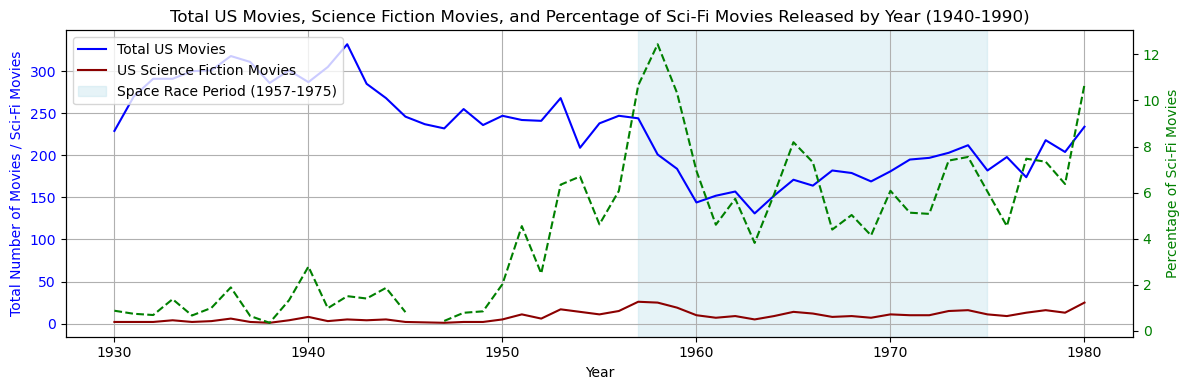

In [ ]:
# Now we get the US movies only
movies_df['genres'] = movies_df['genres'].apply(lambda x: eval(x) if isinstance(x, str) else x)

us_movies_df = movies_df[movies_df['Movie countries'].apply(lambda x: 'United States of America' in x if isinstance(x, list) else False)]
sci_fi_movies_us_df = us_movies_df[us_movies_df['genres'].apply(lambda x: 'Science Fiction' in x if isinstance(x, list) else False)]
sci_fi_movie_count_by_year = sci_fi_movies_us_df.groupby('Release year').size()
total_movies_by_year = us_movies_df.groupby('Release year').size()
sci_fi_percentage_by_year = (sci_fi_movie_count_by_year / total_movies_by_year) * 100

start_year, end_year = 1930, 1980
sci_fi_movie_count_by_year = sci_fi_movie_count_by_year[(sci_fi_movie_count_by_year.index >= start_year) & (sci_fi_movie_count_by_year.index <= end_year)]
total_movies_by_year = total_movies_by_year[(total_movies_by_year.index >= start_year) & (total_movies_by_year.index <= end_year)]
sci_fi_percentage_by_year = sci_fi_percentage_by_year[(sci_fi_percentage_by_year.index >= start_year) & (sci_fi_percentage_by_year.index <= end_year)]

fig, ax1 = plt.subplots(figsize=(12, 4))

ax1.plot(total_movies_by_year.index, total_movies_by_year.values, color='blue', label='Total US Movies')
ax1.plot(sci_fi_movie_count_by_year.index, sci_fi_movie_count_by_year.values, color='darkred', label='US Science Fiction Movies')
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Number of Movies / Sci-Fi Movies', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(sci_fi_percentage_by_year.index, sci_fi_percentage_by_year.values, color='green', label='% Sci-Fi Movies', linestyle='--')
ax2.set_ylabel('Percentage of Sci-Fi Movies', color='green')
ax2.tick_params(axis='y', labelcolor='green')

ax1.axvspan(1957, 1975, color='lightblue', alpha=0.3, label="Space Race Period (1957-1975)")

plt.title('Total US Movies, Science Fiction Movies, and Percentage of Sci-Fi Movies Released by Year (1940-1990)')

ax1.grid(True)

ax1.legend(loc='upper left')

plt.tight_layout()
plt.show()


We did the same as with Germany, we asked chat gpt for all the countries that belonged to the soviet union or names that the SSR could have had, but seeing that there is a very little amount of movies from the SSR in our dataset, we didn't move along with the analysis.

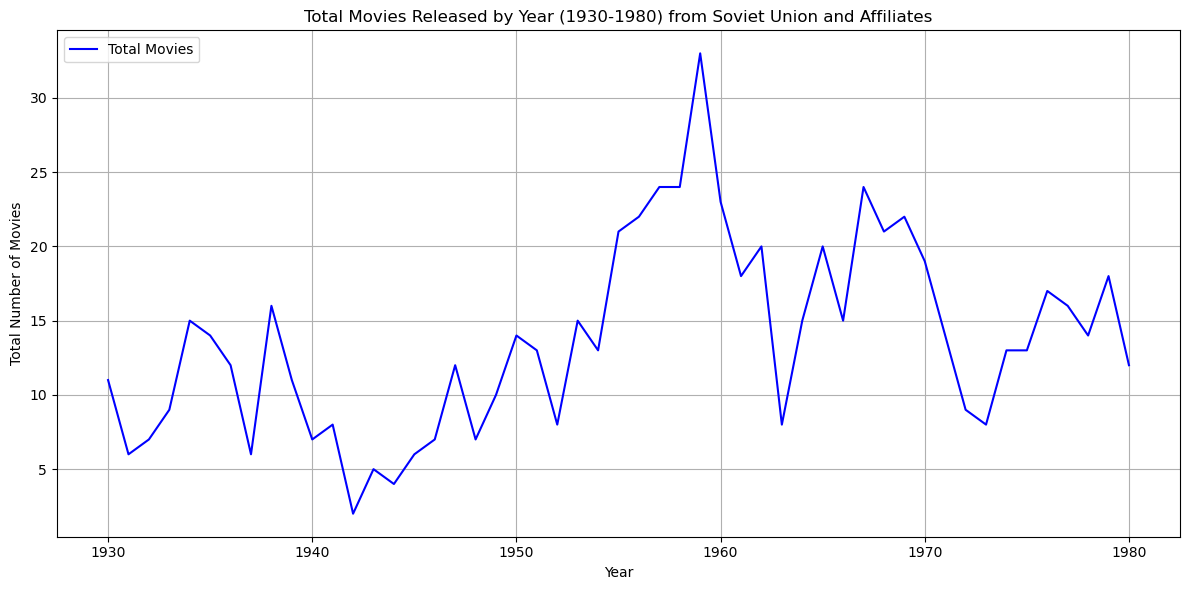

In [71]:
# Similar to what we did with Germany, we asked chatGPT for the names of the SSR or countries that belonged to it
soviet_countries = [
    'Soviet Union', 'Russia', 'Ukraine', 'Uzbekistan', 'Georgia', 'Armenia',
    'Azerbaijan', 'Kazakhstan', 'Belarus', 'Moldova', 'Lithuania', 'Latvia',
    'Estonia', 'Turkmenistan', 'Kyrgyzstan', 'Tajikistan', 'Turkish SSR',
    'Uzbek SSR', 'German Democratic Republic', 'Czechoslovakia', 'Poland'
]


soviet_movies_df = movies_df[movies_df['Movie countries'].apply(lambda x: any(country in soviet_countries for country in x) if isinstance(x, list) else False)]
movie_count_by_year = soviet_movies_df.groupby('Release year').size()

start_year, end_year = 1930, 1980
movie_count_by_year = movie_count_by_year[(movie_count_by_year.index >= start_year) & (movie_count_by_year.index <= end_year)]

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(movie_count_by_year.index, movie_count_by_year.values, color='blue', label='Total Movies')

ax.set_title('Total Movies Released by Year (1930-1980) from Soviet Union and Affiliates')
ax.set_xlabel('Year')
ax.set_ylabel('Total Number of Movies')

ax.grid(True)

ax.legend(loc='upper left')

plt.tight_layout()
plt.show()


For the next analysis we decided to use 9/11 since we all now movies and documentaries based from the terrorist attack. And we focused mainly on documentaries.

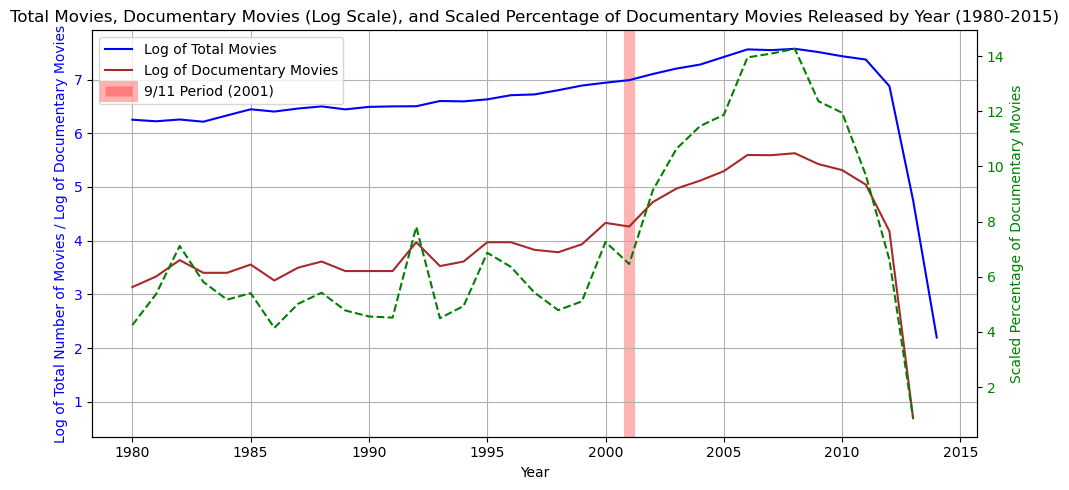

In [ ]:
#Now we gather documentary movies
documentary_movies_df = movies_df[movies_df['genres'].apply(lambda x: 'Documentary' in x if isinstance(x, list) else False)]
documentary_movie_count_by_year = documentary_movies_df.groupby('Release year').size()
total_movies_by_year = movies_df.groupby('Release year').size()
documentary_movie_count_by_year = documentary_movie_count_by_year[(documentary_movie_count_by_year.index >= 1980) & (documentary_movie_count_by_year.index <= 2015)]
total_movies_by_year = total_movies_by_year[(total_movies_by_year.index >= 1980) & (total_movies_by_year.index <= 2015)]
documentary_percentage_by_year = (documentary_movie_count_by_year / total_movies_by_year) * 100

fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.plot(total_movies_by_year.index, np.log1p(total_movies_by_year.values), color='blue', label='Log of Total Movies')
ax1.plot(documentary_movie_count_by_year.index, np.log1p(documentary_movie_count_by_year.values), color='brown', label='Log of Documentary Movies')
ax1.set_xlabel('Year')
ax1.set_ylabel('Log of Total Number of Movies / Log of Documentary Movies', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(documentary_percentage_by_year.index, documentary_percentage_by_year.values, color='green', label=f'Scaled % Documentary Movies', linestyle='--')
ax2.set_ylabel('Scaled Percentage of Documentary Movies', color='green')
ax2.tick_params(axis='y', labelcolor='green')

ax1.axvspan(2001, 2001, color='red', alpha=0.3, label="9/11 Period (2001)", linewidth=8)  # Thicker line for 9/11

plt.title('Total Movies, Documentary Movies (Log Scale), and Scaled Percentage of Documentary Movies Released by Year (1980-2015)')

ax1.grid(True)

ax1.legend(loc='upper left')

plt.tight_layout()
plt.show()


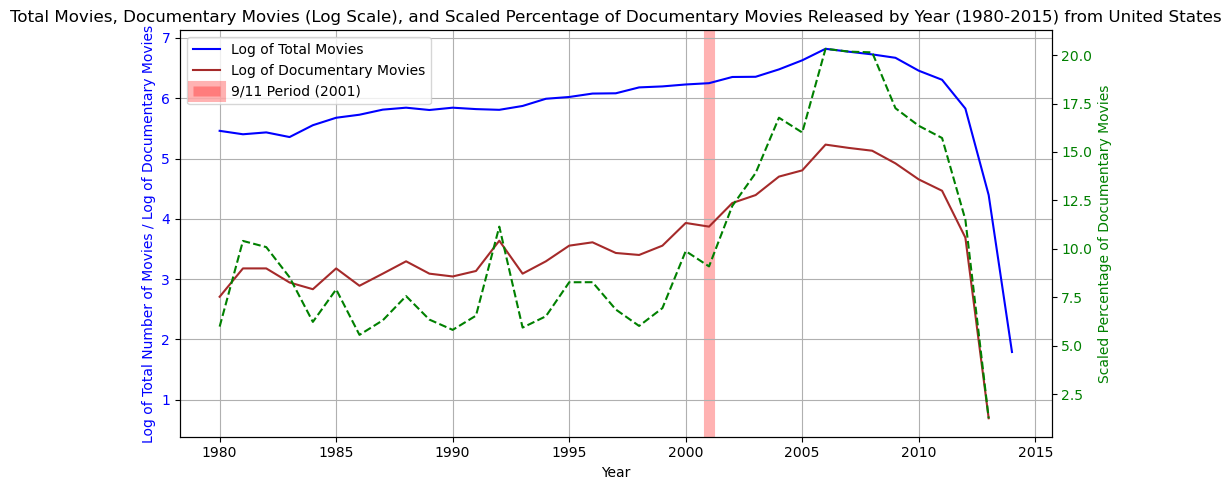

In [ ]:
# Similar process but again obtaining movies only from the US
usa_movies_df = movies_df[movies_df['Movie countries'].apply(lambda x: 'United States of America' in x if isinstance(x, list) else False)]
documentary_movies_usa_df = usa_movies_df[usa_movies_df['genres'].apply(lambda x: 'Documentary' in x if isinstance(x, list) else False)]
documentary_movie_count_by_year = documentary_movies_usa_df.groupby('Release year').size()
total_movies_by_year = usa_movies_df.groupby('Release year').size()
documentary_movie_count_by_year = documentary_movie_count_by_year[(documentary_movie_count_by_year.index >= 1980) & (documentary_movie_count_by_year.index <= 2015)]
total_movies_by_year = total_movies_by_year[(total_movies_by_year.index >= 1980) & (total_movies_by_year.index <= 2015)]
documentary_percentage_by_year = (documentary_movie_count_by_year / total_movies_by_year) * 100

fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.plot(total_movies_by_year.index, np.log1p(total_movies_by_year.values), color='blue', label='Log of Total Movies')
ax1.plot(documentary_movie_count_by_year.index, np.log1p(documentary_movie_count_by_year.values), color='brown', label='Log of Documentary Movies')
ax1.set_xlabel('Year')
ax1.set_ylabel('Log of Total Number of Movies / Log of Documentary Movies', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(documentary_percentage_by_year.index, documentary_percentage_by_year.values, color='green', label=f'Scaled % Documentary Movies', linestyle='--')
ax2.set_ylabel('Scaled Percentage of Documentary Movies', color='green')
ax2.tick_params(axis='y', labelcolor='green')

ax1.axvspan(2001, 2001, color='red', alpha=0.3, label="9/11 Period (2001)", linewidth=8)  # Thicker line for 9/11

plt.title('Total Movies, Documentary Movies (Log Scale), and Scaled Percentage of Documentary Movies Released by Year (1980-2015) from United States')

ax1.grid(True)

ax1.legend(loc='upper left')

plt.tight_layout()
plt.show()


We can effectively see that after 911, documentaries experienced a very noticeable increase in percentage in both the world and in the United States, we can also see that the plot has the same behaviour but if we see closely the percentage amount in the United States is considerably larger than in the world, it goes up to around 40% where in the world around 28% in its peak.

Correlation values

Correlation between WW2 war movies and war movies over the years

In [ ]:
# Obtaining correlation:

# First we get all the war movies and group them by year
war_movies_df = movies_df[movies_df['genres'].apply(lambda x: 'War' in x if isinstance(x, list) else False)]
war_movie_count_by_year = war_movies_df.groupby('Release year').size()
total_movies_by_year = movies_df.groupby('Release year').size()

# Then we obtained the percentage
war_percentage_by_year = (war_movie_count_by_year / total_movies_by_year) * 100

# Then we create an indicator to see if movie occurs during WW2 1 for movies that occured and if not the value is 0
start_year, end_year = 1939, 1945
movies_df['WWII Indicator'] = movies_df['Release year'].apply(lambda x: 1 if start_year <= x <= end_year else 0)
wwii_indicator_by_year = movies_df.groupby('Release year')['WWII Indicator'].max()

#Finaly we calculate the correlation between the percentage of war movies and the years of war
correlation = war_percentage_by_year.corr(wwii_indicator_by_year)

print("Correlation between WWII period and percentage of war movies produced:", correlation)

Correlation between WWII period and percentage of war movies produced: 0.7026031758199529


Correlation between WW2 war movies and war movies over the years in the United States

In [ ]:
# First we get all the war movies from the US and group them by year
us_movies_df = movies_df[movies_df['Movie countries'].apply(lambda x: 'United States of America' in x if isinstance(x, list) else False)]
war_movies_us_df = us_movies_df[us_movies_df['genres'].apply(lambda x: 'War' in x if isinstance(x, list) else False)]
war_movie_count_by_year_us = war_movies_us_df.groupby('Release year').size()
total_movies_by_year_us = us_movies_df.groupby('Release year').size()

# Then we obtained the percentage
war_percentage_by_year_us = (war_movie_count_by_year_us / total_movies_by_year_us) * 100

# Then we create an indicator to see if movie occurs during WW2 1 for movies that occured and if not the value is 0
start_year, end_year = 1939, 1945
us_movies_df.loc[:, 'WWII Indicator'] = us_movies_df['Release year'].apply(lambda x: 1 if start_year <= x <= end_year else 0)
wwii_indicator_by_year_us = us_movies_df.groupby('Release year')['WWII Indicator'].max()

#Finaly we calculate the correlation between the percentage of war movies and the years of war from the US
correlation_us = war_percentage_by_year_us.corr(wwii_indicator_by_year_us)

print("Correlation between WWII period and percentage of War movies produced in the United States:", correlation_us)


Correlation between WWII period and percentage of War movies produced in the United States: 0.5568404191225109


In [ ]:
# First we get all the war movies from the UK and group them by year
uk_movies_df = movies_df[movies_df['Movie countries'].apply(lambda x: 'United Kingdom' in x if isinstance(x, list) else False)]
war_movies_uk_df = uk_movies_df[uk_movies_df['genres'].apply(lambda x: 'War' in x if isinstance(x, list) else False)]
war_movie_count_by_year_uk = war_movies_uk_df.groupby('Release year').size()
total_movies_by_year_uk = uk_movies_df.groupby('Release year').size()

# Then we obtained the percentage
war_percentage_by_year_uk = (war_movie_count_by_year_uk / total_movies_by_year_uk) * 100

# Then we create an indicator to see if movie occurs during WW2 1 for movies that occured and if not the value is 0
start_year, end_year = 1939, 1945
uk_movies_df.loc[:, 'WWII Indicator'] = uk_movies_df['Release year'].apply(lambda x: 1 if start_year <= x <= end_year else 0)
wwii_indicator_by_year_us = uk_movies_df.groupby('Release year')['WWII Indicator'].max()

#Finaly we calculate the correlation between the percentage of war movies and the years of war from the UK
correlation_us = war_percentage_by_year_uk.corr(wwii_indicator_by_year_us)

print("Correlation between WWII period and percentage of War movies produced in the United Kigdom:", correlation_us)


Correlation between WWII period and percentage of War movies produced in the United Kigdom: 0.7311747046857167


In [ ]:
# First we get all the mystery movies and group them by year
mystery_movies_df = movies_df[movies_df['genres'].apply(lambda x: 'Mystery' in x if isinstance(x, list) else False)]
mystery_movie_count_by_year = mystery_movies_df.groupby('Release year').size()
total_movies_by_year = movies_df.groupby('Release year').size()

# Then we obtained the percentage
mystery_percentage_by_year = (mystery_movie_count_by_year / total_movies_by_year) * 100

# Then we create an indicator to see if movie occurs during WW2 1 for movies that occured and if not the value is 0
start_year, end_year = 1932, 1948
movies_df['WWII Indicator'] = movies_df['Release year'].apply(lambda x: 1 if start_year <= x <= end_year else 0)
wwii_indicator_by_year = movies_df.groupby('Release year')['WWII Indicator'].max()

correlation = mystery_percentage_by_year.corr(wwii_indicator_by_year)

print("Correlation between WWII period and percentage of Mystery movies produced:", correlation)

Correlation between WWII period and percentage of Mystery movies produced: 0.613108041642558


In [ ]:
# First we get all the Documentary movies and group them by year
documentary_movies_df = movies_df[movies_df['genres'].apply(lambda x: 'Documentary' in x if isinstance(x, list) else False)]
documentary_movies_1910_1960_df = documentary_movies_df[(documentary_movies_df['Release year'] >= 1910) & (documentary_movies_df['Release year'] <= 1960)]
documentary_movie_count_by_year = documentary_movies_1910_1960_df.groupby('Release year').size()
total_movies_by_year_1910_1960 = movies_df[(movies_df['Release year'] >= 1910) & (movies_df['Release year'] <= 1960)].groupby('Release year').size()

# Then we obtained the percentage
documentary_percentage_by_year = (documentary_movie_count_by_year / total_movies_by_year_1910_1960) * 100

# Then we create an indicator to see if movie occurs during WW2 1 for movies that occured and if not the value is 0
start_year, end_year = 1939, 1945
movies_df['WWII Indicator'] = movies_df['Release year'].apply(lambda x: 1 if start_year <= x <= end_year else 0)
wwii_indicator_by_year = movies_df[(movies_df['Release year'] >= 1910) & (movies_df['Release year'] <= 1960)].groupby('Release year')['WWII Indicator'].max()

correlation = documentary_percentage_by_year.corr(wwii_indicator_by_year)

print("Correlation between WWII period and percentage of Documentary movies produced (1910-1960):", correlation)

Correlation between WWII period and percentage of Documentary movies produced (1910-1960): 0.5046581365512196


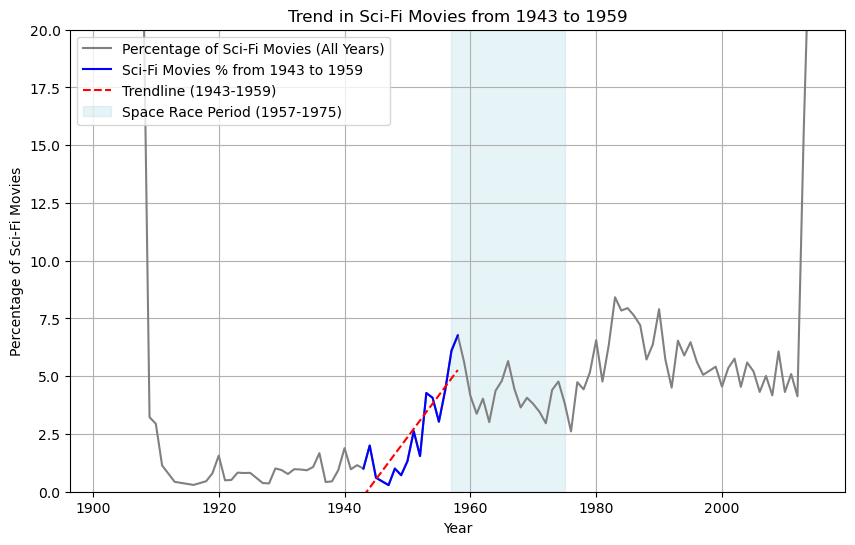

Slope from 1943 to 1959: 0.363704049083808


In [ ]:
# First we get the science fiction movies, count them and obtain the percentage
sci_fi_movies_df = movies_df[movies_df['genres'].apply(lambda x: 'Science Fiction' in x if isinstance(x, list) else False)]
sci_fi_count_by_year = sci_fi_movies_df.groupby('Release year').size()
total_movies_by_year = movies_df.groupby('Release year').size()
sci_fi_percentage_by_year = ((sci_fi_count_by_year / total_movies_by_year) * 100).dropna()


#Then we adjust the period to focus our function
pre_space_race_years = range(1943, 1959)
sci_fi_percentage_pre_space_race = sci_fi_percentage_by_year[sci_fi_percentage_by_year.index.isin(pre_space_race_years)]

# Next we get our X and Y values
years = np.array(sci_fi_percentage_pre_space_race.index).reshape(-1, 1)
percentages = sci_fi_percentage_pre_space_race.values

# We apply regresion using function from sklearn
model = LinearRegression()
model.fit(years, percentages)
trendline = model.predict(years)

plt.figure(figsize=(10, 6))
plt.plot(sci_fi_percentage_by_year.index, sci_fi_percentage_by_year.values, color='gray', label='Percentage of Sci-Fi Movies (All Years)')
plt.plot(sci_fi_percentage_pre_space_race.index, sci_fi_percentage_pre_space_race.values, color='blue', label='Sci-Fi Movies % from 1943 to 1959')
plt.plot(sci_fi_percentage_pre_space_race.index, trendline, color='red', linestyle='--', label='Trendline (1943-1959)')

plt.axvspan(1957, 1975, color='lightblue', alpha=0.3, label="Space Race Period (1957-1975)")

plt.ylim(0, 20)

plt.xlabel('Year')
plt.ylabel('Percentage of Sci-Fi Movies')
plt.title('Trend in Sci-Fi Movies from 1943 to 1959')
plt.legend()
plt.grid(True)
plt.show()

#Finaly we display the slope value
print("Slope from 1943 to 1959:", model.coef_[0])



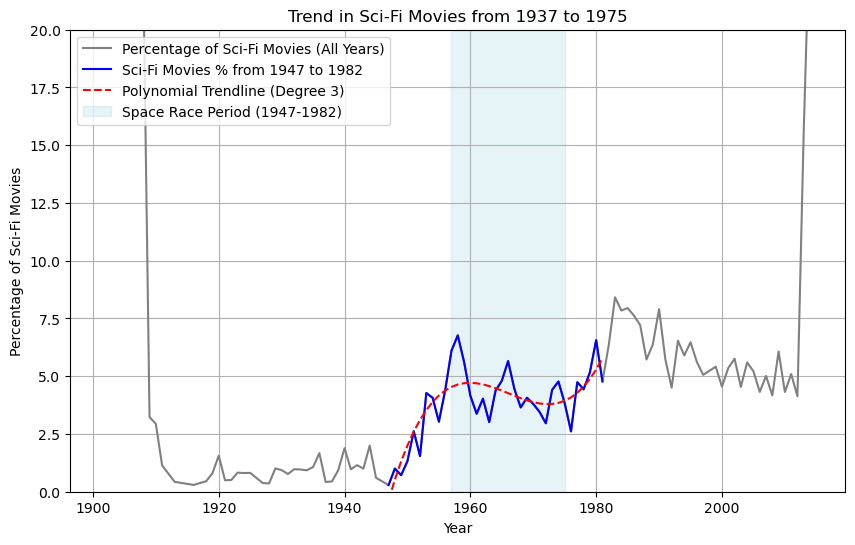

Polynomial Function: f(x) = -7347527.801 + 11211.419*x^1 + -5.702*x^2 + 0.001*x^3


In [ ]:
# First we get the science fiction movies, count them and obtain the percentage
sci_fi_movies_df = movies_df[movies_df['genres'].apply(lambda x: 'Science Fiction' in x if isinstance(x, list) else False)]
sci_fi_count_by_year = sci_fi_movies_df.groupby('Release year').size()
total_movies_by_year = movies_df.groupby('Release year').size()
sci_fi_percentage_by_year = (sci_fi_count_by_year / total_movies_by_year * 100).dropna()

#Then we adjust the period to focus our function
pre_space_race_years = range(1947, 1982)
sci_fi_percentage_pre_space_race = sci_fi_percentage_by_year[sci_fi_percentage_by_year.index.isin(pre_space_race_years)]

sci_fi_percentage_pre_space_race = sci_fi_percentage_pre_space_race.reindex(pre_space_race_years, fill_value=0)

# Later we adjust our data for our function
years = np.array(sci_fi_percentage_pre_space_race.index)
percentages = sci_fi_percentage_pre_space_race.values

# We apply a 3rd degree polynomial function
degree = 3
poly_model = Polynomial.fit(years, percentages, degree)

trendline = poly_model(years)

plt.figure(figsize=(10, 6))
plt.plot(sci_fi_percentage_by_year.index, sci_fi_percentage_by_year.values, color='gray', label='Percentage of Sci-Fi Movies (All Years)')
plt.plot(sci_fi_percentage_pre_space_race.index, sci_fi_percentage_pre_space_race.values, color='blue', label='Sci-Fi Movies % from 1947 to 1982')
plt.plot(sci_fi_percentage_pre_space_race.index, trendline, color='red', linestyle='--', label=f'Polynomial Trendline (Degree {degree})')

plt.axvspan(1957, 1975, color='lightblue', alpha=0.3, label="Space Race Period (1947-1982)")

plt.ylim(0, 20)

plt.xlabel('Year')
plt.ylabel('Percentage of Sci-Fi Movies')
plt.title('Trend in Sci-Fi Movies from 1937 to 1975')
plt.legend()
plt.grid(True)
plt.show()


# Finaly we display the function
coefficients = poly_model.convert().coef
poly_function_str = "f(x) = " + " + ".join(f"{coef:.3f}*x^{i}" if i > 0 else f"{coef:.3f}" for i, coef in enumerate(coefficients))
print("Polynomial Function:", poly_function_str)


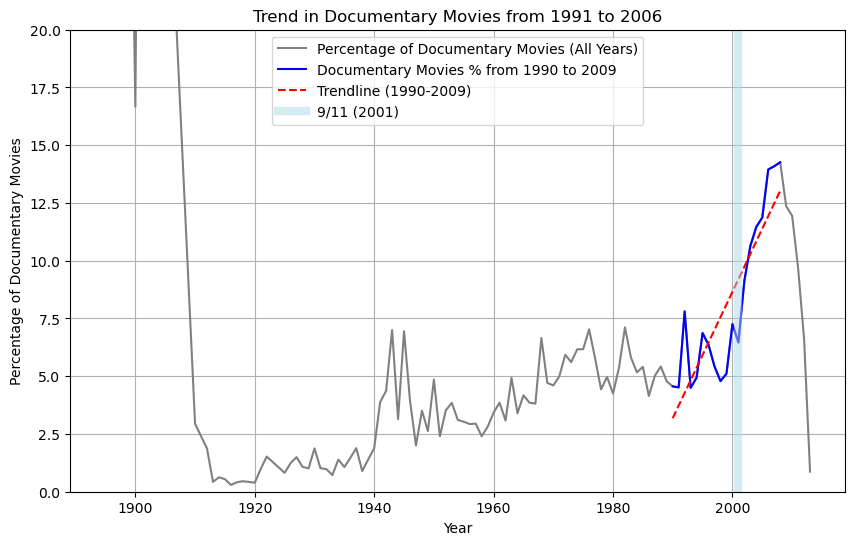

Slope from 1990 to 2009: 0.5469591820903333


In [ ]:
# First we get the documentary movies, count them and obtain the percentage
documentary_movies_df = movies_df[movies_df['genres'].apply(lambda x: 'Documentary' in x if isinstance(x, list) else False)]
documentary_count_by_year = documentary_movies_df.groupby('Release year').size()
total_movies_by_year = movies_df.groupby('Release year').size()
documentary_percentage_by_year = ((documentary_count_by_year / total_movies_by_year) * 100).dropna()

#Then we adjust the period to focus our function
pre_post_911_years = range(1990, 2009)
documentary_percentage_pre_post_911 = documentary_percentage_by_year[documentary_percentage_by_year.index.isin(pre_post_911_years)]

# Next we get our X and Y values
years = np.array(documentary_percentage_pre_post_911.index).reshape(-1, 1)
percentages = documentary_percentage_pre_post_911.values

# We apply regresion using function from sklearn
model = LinearRegression()
model.fit(years, percentages)
trendline = model.predict(years)

plt.figure(figsize=(10, 6))
plt.plot(documentary_percentage_by_year.index, documentary_percentage_by_year.values, color='gray', label='Percentage of Documentary Movies (All Years)')
plt.plot(documentary_percentage_pre_post_911.index, documentary_percentage_pre_post_911.values, color='blue', label='Documentary Movies % from 1990 to 2009')
plt.plot(documentary_percentage_pre_post_911.index, trendline, color='red', linestyle='--', label='Trendline (1990-2009)')

plt.axvline(x=2001, color='lightblue', alpha=0.5, linestyle='-', linewidth=6, label="9/11 (2001)")

plt.ylim(0, 20)

plt.xlabel('Year')
plt.ylabel('Percentage of Documentary Movies')
plt.title('Trend in Documentary Movies from 1991 to 2006')
plt.legend()
plt.grid(True)
plt.show()

# Display the slope value
print("Slope from 1990 to 2009:", model.coef_[0])


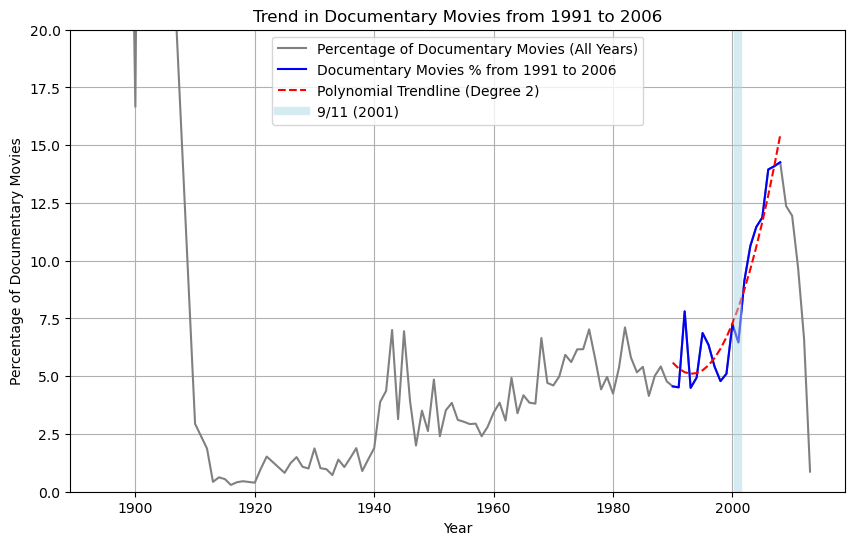

Polynomial Function: f(x) = 187465.291 + -188.099*x^1 + 0.047*x^2


In [ ]:
# First we get the documentary movies, count them and obtain the percentage
documentary_movies_df = movies_df[movies_df['genres'].apply(lambda x: 'Documentary' in x if isinstance(x, list) else False)]
documentary_count_by_year = documentary_movies_df.groupby('Release year').size()
total_movies_by_year = movies_df.groupby('Release year').size()
documentary_percentage_by_year = (documentary_count_by_year / total_movies_by_year * 100).dropna()

#Then we adjust the period to focus our function
pre_post_911_years = range(1990, 2009)
documentary_percentage_pre_post_911 = documentary_percentage_by_year[documentary_percentage_by_year.index.isin(pre_post_911_years)]

documentary_percentage_pre_post_911 = documentary_percentage_pre_post_911.reindex(pre_post_911_years, fill_value=0)

# Later we adjust our data for our function
years = np.array(documentary_percentage_pre_post_911.index)
percentages = documentary_percentage_pre_post_911.values

# We apply a 2nd degree polynomial function (we used second because 3rd displayed the same plot)
degree = 2
poly_model = Polynomial.fit(years, percentages, degree)

trendline = poly_model(years)

plt.figure(figsize=(10, 6))
plt.plot(documentary_percentage_by_year.index, documentary_percentage_by_year.values, color='gray', label='Percentage of Documentary Movies (All Years)')
plt.plot(documentary_percentage_pre_post_911.index, documentary_percentage_pre_post_911.values, color='blue', label='Documentary Movies % from 1991 to 2006')
plt.plot(documentary_percentage_pre_post_911.index, trendline, color='red', linestyle='--', label=f'Polynomial Trendline (Degree {degree})')

plt.axvline(x=2001, color='lightblue', alpha=0.5, linestyle='-', linewidth=6, label="9/11 (2001)")

plt.ylim(0, 20)

plt.xlabel('Year')
plt.ylabel('Percentage of Documentary Movies')
plt.title('Trend in Documentary Movies from 1991 to 2006')
plt.legend()
plt.grid(True)
plt.show()

# Finaly we display the function
coefficients = poly_model.convert().coef
poly_function_str = "f(x) = " + " + ".join(f"{coef:.3f}*x^{i}" if i > 0 else f"{coef:.3f}" for i, coef in enumerate(coefficients))
print("Polynomial Function:", poly_function_str)



# Impact of seasons on Movies

In [ ]:
# Okay, so that's for some basic analysis we need for our assignment
# So, we would now like to start analyzing movies based on the season - summer, autumn, winter and spring
# Since our analysis is based on season for now, we are going to make a dataset that contains only movies which have month/year and day/month/year release_date formats
import re

full_date_pattern = r'\d{4}-\d{2}-\d{2}'
month_year_pattern = r'\d{4}-\d{2}'

def is_month_year_only(date_str):
    return bool(re.match(month_year_pattern, str(date_str)))
def is_full_date(date_str):
    return bool(re.match(full_date_pattern, str(date_str)))

df_seasons = df_filtered[df_filtered['release_date'].apply(is_month_year_only)]

print(f"Number of movies that have at least month and a year: {df_seasons.shape[0]}")
print(f"Number of movies that have any date (but not NaN): {df_filtered.shape[0]}")

Number of movies that have at least month and a year: 57589
Number of movies that have any date (but not NaN): 60052


In [ ]:
# Cool! Now we have to divide them in seasons
# How to divide those that have only month and year?
print(f"Number of movies that have day, month and a year: {df_seasons[df_seasons['release_date'].apply(is_full_date)].shape[0]}")

Number of movies that have day, month and a year: 57589


In [ ]:
# Since we can't really divide the movies that only have a month (we can drop them, that's an option), we are going to divide the seasons like groups of 3 month each
def find_season(date_str):
    if is_full_date(date_str) or is_month_year_only(date_str):
        month = date_str.month  #get just the month
        if month in [12, 1, 2]:
            return 'Winter'
        elif month in [3, 4, 5]:
            return 'Spring'
        elif month in [6, 7, 8]:
            return 'Summer'
        elif month in [9, 10, 11]:
            return 'Autumn'
    return None

df_seasons.loc[:, 'season'] = df_seasons['release_date'].apply(find_season)
df_summer = df_seasons[df_seasons['season']=='Summer']
df_autumn = df_seasons[df_seasons['season']=='Autumn']
df_winter = df_seasons[df_seasons['season']=='Winter']
df_spring = df_seasons[df_seasons['season']=='Spring']

# What is the number of movies in each dataset?
print(f"Movies released in summer: {df_summer.shape[0]}")
print(f"Movies released in autumn: {df_autumn.shape[0]}")
print(f"Movies released in winter: {df_winter.shape[0]}")
print(f"Movies released in spring: {df_spring.shape[0]}")

Movies released in summer: 12257
Movies released in autumn: 15956
Movies released in winter: 15568
Movies released in spring: 13808


/var/folders/k0/q2ncgz050jd3c9d6y1qks52c0000gn/T/ipykernel_71813/735961753.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seasons.loc[:, 'season'] = df_seasons['Release date'].apply(find_season)


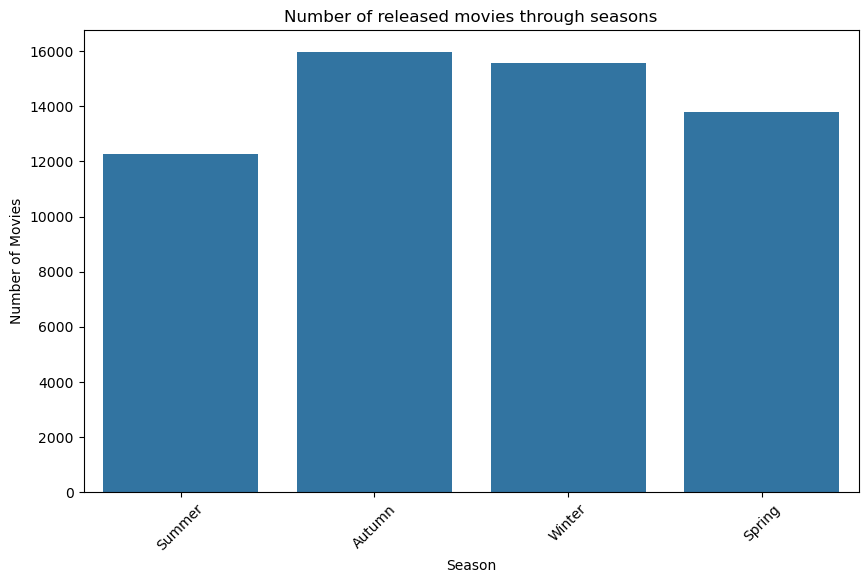

In [86]:
# Let's look at the ditribution of movies through seasons
plt.figure(figsize=(10, 6))
sns.countplot(x='season', data=df_seasons, order=['Summer', 'Autumn','Winter', 'Spring'])
plt.title('Number of released movies through seasons')
plt.xlabel('Season')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

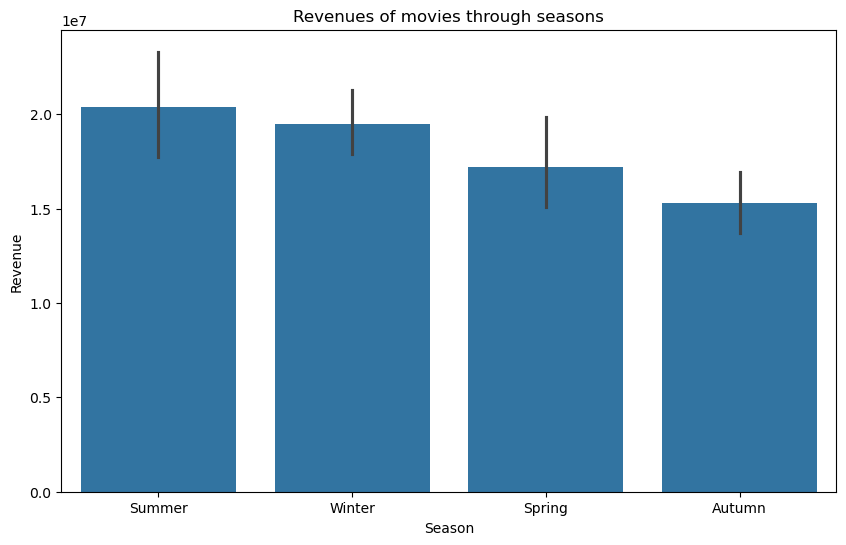

In [ ]:
# Do movies in each season tend to have a different revenu? popularity? budget? Maybe even runtime? What about genre, does certain genre get more released in certain season?
# These are all questions we want to find answers for

# We will start with revenue
plt.figure(figsize=(10, 6))
sns.barplot(x="season", y="revenue", data=df_seasons)
plt.title('revenues of movies through seasons')
plt.xlabel('Season')
plt.ylabel('revenue')
plt.show()

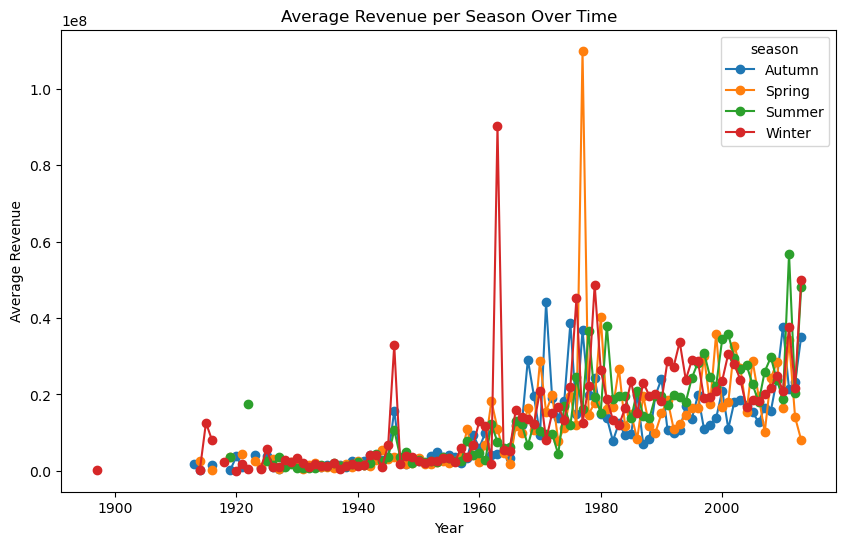

In [ ]:
# Does seasonal revenue change over time?
seasonal_revenue = df_seasons.groupby(['Release year', 'season'])['revenue'].mean().unstack()
seasonal_revenue.plot(figsize=(10, 6), marker='o')
plt.title('Average revenue per Season Over Time')
plt.xlabel('Year')
plt.ylabel('Average revenue')
plt.show()

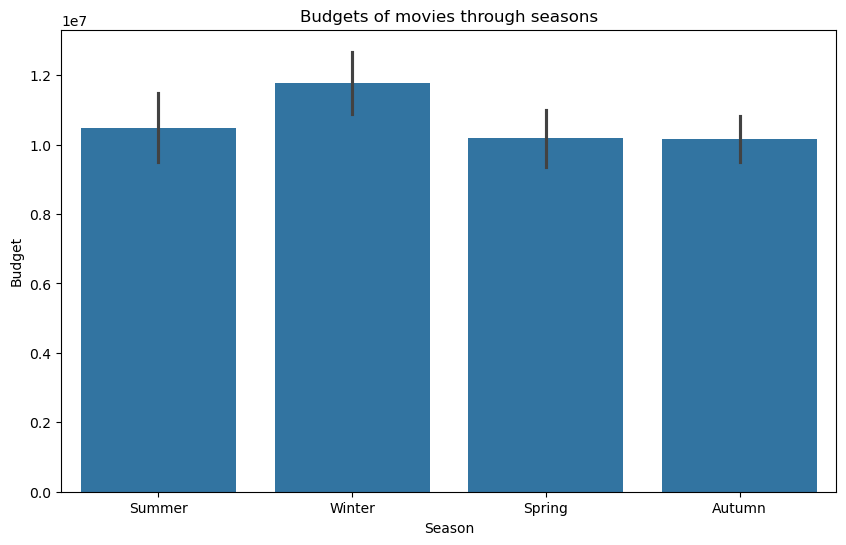

In [ ]:
# So, movies released in summer tend to have the biggest revenue... Why is that? Are they maybe blockbusters? Is it because people tend to have more free time during summer?
# Let's see how does budget look for different seasons
plt.figure(figsize=(10, 6))
sns.barplot(x="season", y="budget", data=df_seasons)
plt.title('budgets of movies through seasons')
plt.xlabel('Season')
plt.ylabel('budget')
plt.show()

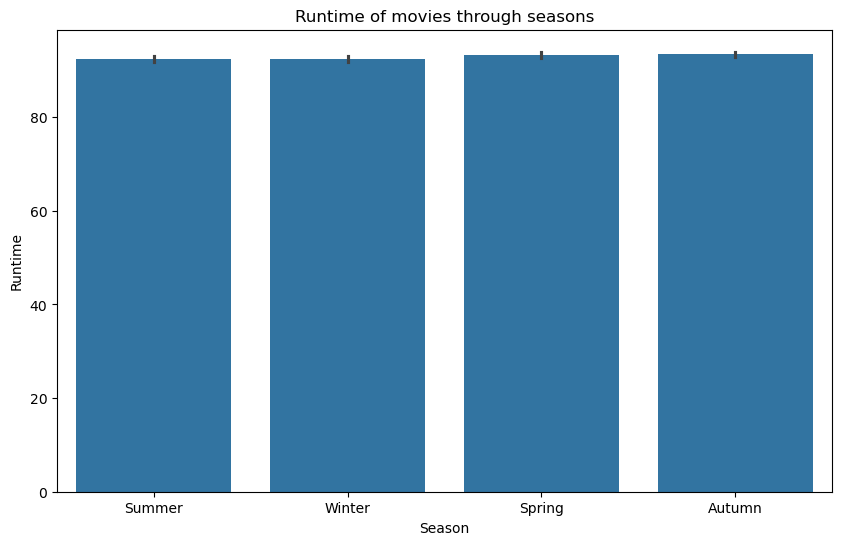

In [ ]:
# If we were thinking about blockbusters, it would make sense they would have the biggest budgets
# What about runtime? It may not seem important, but maybe indie, short movies are popular in some seasons?
plt.figure(figsize=(10, 6))
sns.barplot(x="season", y="runtime", data=df_seasons)
plt.title('Runtime of movies through seasons')
plt.xlabel('Season')
plt.ylabel('Runtime')
plt.show()

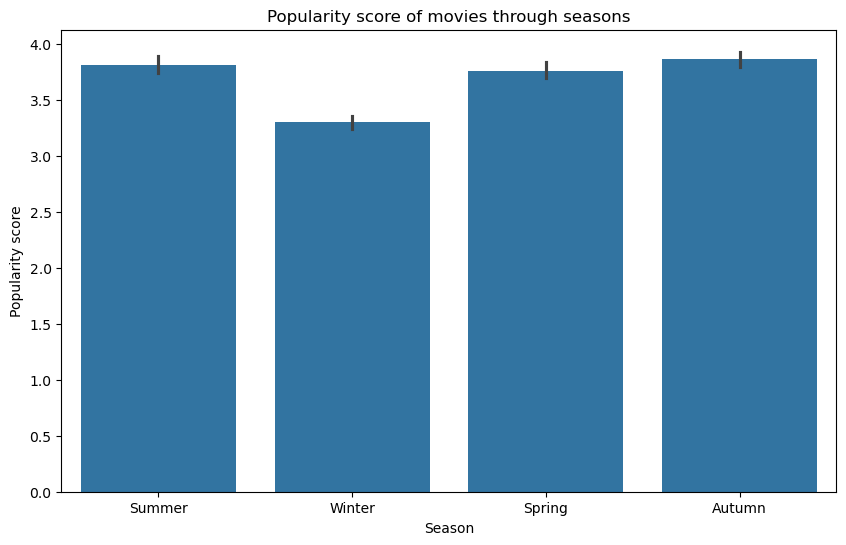

In [ ]:
# So, quite constant - around 90 minutes seems like a sweet spot
# We shpuld check out popularity too
plt.figure(figsize=(10, 6))
sns.barplot(x="season", y="popularity", data=df_seasons)
plt.title('popularity score of movies through seasons')
plt.xlabel('Season')
plt.ylabel('popularity score')
plt.show()

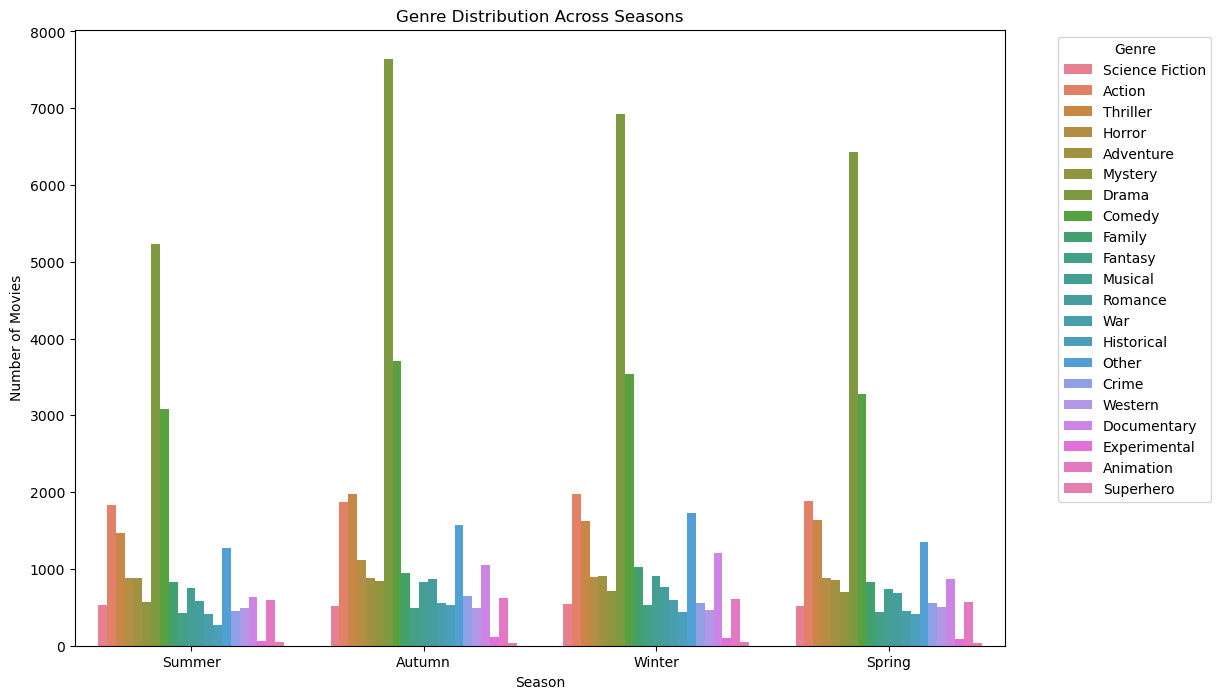

In [ ]:
# Interesting, maybe people do tend to like watching movies during summer...
# In the end, the most important part - we would love to know what are the most popular genres in each season
df_seasons_exploded = df_seasons.explode('genres')

plt.figure(figsize=(12, 8))
sns.countplot(x='season', hue='genres', data=df_seasons_exploded, order=['Summer', 'Autumn', 'Winter', 'Spring'])
plt.title('Genre Distribution Across Seasons')
plt.xlabel('Season')
plt.ylabel('Number of Movies')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

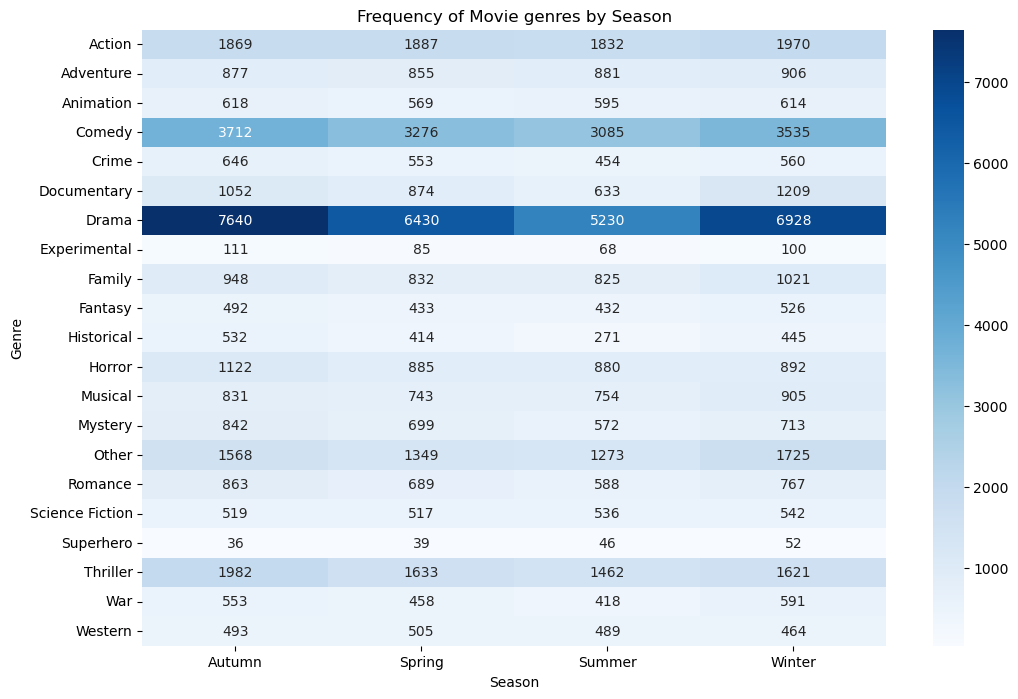

In [ ]:
# Another way to inspect
genre_season_pivot = df_seasons_exploded.pivot_table(index='genres', columns='season', aggfunc='size', fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(genre_season_pivot, annot=True, cmap='Blues', fmt="d")
plt.title('Frequency of genres by Season')
plt.xlabel('Season')
plt.ylabel('Genre')
plt.show()

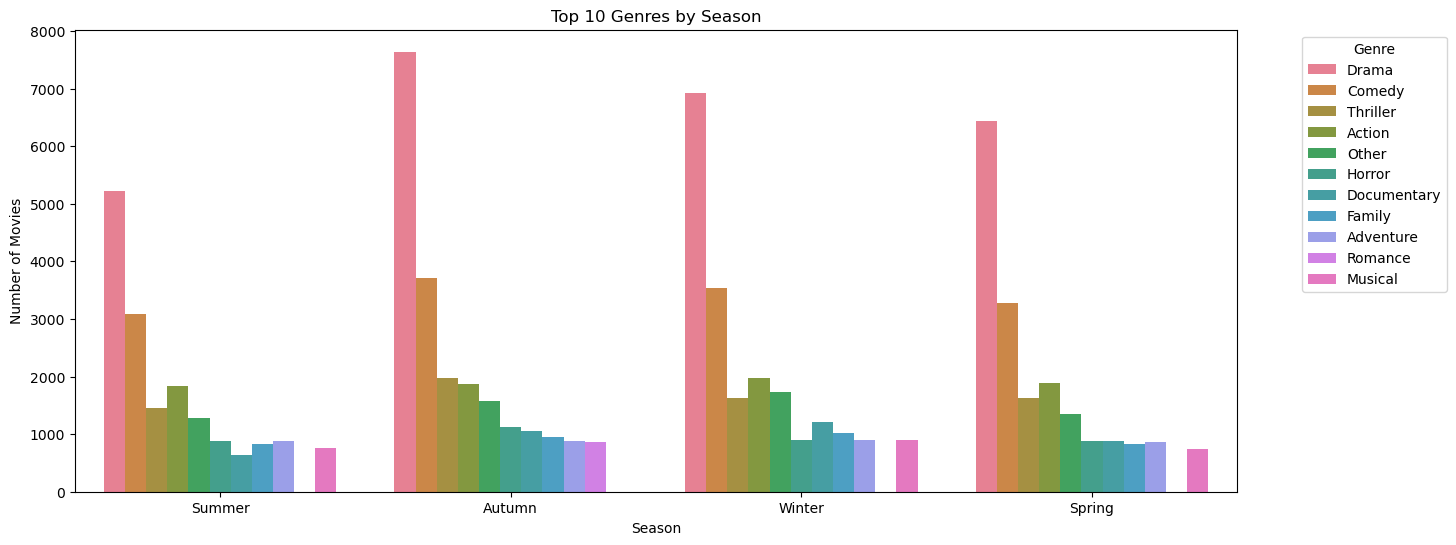

In [ ]:
#Let's view season by season, to see better what genres are when popular
genre_counts = df_seasons_exploded.groupby(['season', 'genres']).size().reset_index(name='count')
top_genres_per_season = genre_counts.sort_values(['season', 'count'], ascending=[True, False])
top_genres_per_season = top_genres_per_season.groupby('season').head(10)

plt.figure(figsize=(15, 6))
sns.barplot(data=top_genres_per_season, x='season', y='count', hue='genres', order=['Summer', 'Autumn', 'Winter', 'Spring'])
plt.title('Top 10 Genres by Season')
plt.xlabel('Season')
plt.ylabel('Number of Movies')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

We have seen on one of the previous boxplots that movies released in summer get more revenue, followed by movies released in winter. Is this a coincidence, or is there an actual pattern here? Let's test this!

In [ ]:
# Now that we looked at a lot of plots, let's actually ask some questions
# Let's first start with the most obvious one, revenue - does the season in which movie is released in impact the revenue?

df_seasons['season'] = df_seasons['season'].astype('category')
model_season_revenue = smf.ols(formula='revenue ~ C(season)', data=df_seasons)
results_season_revenue = model_season_revenue.fit()
print(results_season_revenue.summary())

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     4.535
Date:                Fri, 15 Nov 2024   Prob (F-statistic):            0.00351
Time:                        19:28:52   Log-Likelihood:            -1.6259e+05
No. Observations:                8488   AIC:                         3.252e+05
Df Residuals:                    8484   BIC:                         3.252e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             1.53e+07   1

/var/folders/k0/q2ncgz050jd3c9d6y1qks52c0000gn/T/ipykernel_71813/1013682970.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seasons['season'] = df_seasons['season'].astype('category')


For this regression, we are going to use $5\%$ significance level.
The intercept value is $1.518\cdot10^7$ (or $~\$15.8$ million), so this is the baseline for revenue of movies released in reference season, which is autumn. For spring, the coefficient is $\beta_{spring}=1.986\cdot10^6$ ($~\$1.99$ million), which would mean that movies released in spring get $~\$1.99$ million more in revenue that those released in reference season, BUT, the p-value for spring is $p=0.184$, which is definitely bigger than $5\%$, which is our significance level, meaning that this coefficient isn't statistically significant. This implies that revenue of movies released in spring doesn't differ much from ones released in autumn. Next is summer, with coefficient of $\beta_{summer}=5.08\cdot10^6$ ($~\$5.08$ million), and p-value of $p=0.001$. The p-value is less than significance level, meaning that this is statistically significant. This implies that when holding other variables constant, movies released in summer do tend to have a bigger revenue by $~\$5.08$ million compared to those that are released in autumn. Finally, winter movies have coefficients  $\beta_{winter}=4.06\cdot10^6$ and p-value of $p=0.007$, again less than $5\%$, meaning this is statistically significant.
However, when we look at the R-squared value given by the ols model, it is onlt $R^2=0.002$, meaning that only $0.2\%$ of variance of revenue is explained by the season alone. This is quite low, so we can't really predict the movies revenue just based on the season. Other factors, like budget or runtime, likely play a big role in movies revenue.

In [ ]:
model_season_popularity = smf.ols(formula='popularity ~ C(season)', data=df_seasons)
results_season_popularity = model_season_popularity.fit()
print(results_season_popularity.summary())

                            OLS Regression Results                            
Dep. Variable:             Popularity   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     57.96
Date:                Fri, 15 Nov 2024   Prob (F-statistic):           2.17e-37
Time:                        19:29:27   Log-Likelihood:            -1.2932e+05
No. Observations:               46795   AIC:                         2.586e+05
Df Residuals:                   46791   BIC:                         2.587e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               3.8656    

We also wanted to test how different seasons affect popularity score of the movies. Again, autumn is a reference season. We have a intercept of $3.8656$, which represents the average popularity score for movies released in autumn. For spring, we have a negative coefficient of $\beta_{spring} = -0.1068$, with p-value of $p=0.032$, so bigger than significance level (but this is not that big, we would reject the null hypothesis at $1\%$ significance level). This means that movies released in spring tend to have a slightly lower score than those released in autumn. For summer, we again have a negative coefficient, but now p-value is $p=0.293$, so we conclude that the difference is not statistically significant. Winter has also a negative coefficient of $\beta_{winter} = -0.1068$, with p-value being $p < 0.001$. This implies that movies released in winter to have a significantly lower popularity score average compared to those that are released in autumn.
Finally, we can look at $R^2=0.004$, which means that only $4\%$ of variance of popularity score is actually explained by season. Nevertheless, F-statistic is quite big $F=57.96$, meaning that even though the effect size is small, it's unlikely due to random chance.

In [ ]:
# After reviewing how the season affect revenue and popularity, we would like to delve deeper into genres
# Are certain genres more frequently released in certain seasons?
# Let's investigate this!

df_exploded = df_seasons.explode('genres')
df_genres = df_exploded['genres'].str.get_dummies() #converting to one hot encoded columns
df_genres_grouped = df_genres.groupby(df_exploded.index).sum()
df_seasons_added_genres = pd.concat([df_seasons, df_genres_grouped], axis=1)
season_genre_counts = df_seasons_added_genres.groupby('season')[df_genres_grouped.columns].sum()
df_seasons_added_genres.head()

/var/folders/k0/q2ncgz050jd3c9d6y1qks52c0000gn/T/ipykernel_71813/3108097102.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_genre_counts = df_seasons_added_genres.groupby('season')[df_genres_grouped.columns].sum()


Wikipedia movie ID Freebase movie ID  \
0            975900.0         /m/03vyhn   
1           3196793.0         /m/08yl5d   
4            261236.0         /m/01mrr1   
5          13696889.0        /m/03cfc81   
6          18998739.0        /m/04jcqvw   

                                          Movie name  \
0                                     Ghosts of Mars   
1  Getting Away with Murder: The JonBenét Ramsey ...   
4                                  A Woman in Flames   
5                                      The Gangsters   
6                          The Sorcerer's Apprentice   

                   Movie languages             Movie countries      Budget  \
0               [English Language]  [United States of America]  28000000.0   
1               [English Language]  [United States of America]         NaN   
4                [German Language]                   [Germany]         NaN   
5  [Silent film, English Language]  [United States of America]         NaN   
6               [English Language]              [South Africa]         NaN   

   Popularity     Revenue  Movie runtime  \
0      14.189  14010832.0           98.0   
1       0.600         NaN           95.0   
4       2.801         NaN          106.0   
5       0.600         NaN           35.0   
6       3.407         NaN           86.0   

                                        Movie genres  ... Horror  Musical  \
0  [Science Fiction, Action, Thriller, Horror, Ad...  ...      1        0   
1                                   [Mystery, Drama]  ...      0        0   
4                                            [Drama]  ...      0        0   
5                                           [Comedy]  ...      0        0   
6                       [Family, Fantasy, Adventure]  ...      0        0   

  Mystery  Other  Romance  Science Fiction  Superhero  Thriller  War  Western  
0       0      0        0                1          0         1    0        0  
1       1      0        0                0          0         0    0        0  
4       0      0        0                0          0         0    0        0  
5       0      0        0                0          0         0    0        0  
6       0      0        0                0          0         0    0        0  

[5 rows x 34 columns]

In [104]:
chi2, p, dof, expected = chi2_contingency(season_genre_counts)
print(f'Chi-Square Statistic: {chi2}, p-value: {p}')

Chi-Square Statistic: 460.82472603392813, p-value: 3.6093058057795336e-63


Since the p-value is $p=8.65\cdot10^{-60}$, we can conlude that the result is statistically significant. We have strong evidence to reject the null hypothesis, which is that there is no relationship between season and genre of the movie.

In [ ]:
genre_season_performance = df_seasons.explode('genres').groupby(['genres', 'season']).agg({
    'revenue': 'mean',
    'popularity': 'mean'
}).reset_index()

# Display the first few rows to check the result
print(genre_season_performance.head())

  Movie genres  season       Revenue  Popularity
0       Action  Autumn  2.081282e+07    4.987511
1       Action  Spring  3.537069e+07    5.187439
2       Action  Summer  3.486132e+07    5.157106
3       Action  Winter  2.393146e+07    4.810075
4    Adventure  Autumn  3.807703e+07    4.910291


/var/folders/k0/q2ncgz050jd3c9d6y1qks52c0000gn/T/ipykernel_71813/876838875.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  genre_season_performance = df_seasons.explode('Movie genres').groupby(['Movie genres', 'season']).agg({


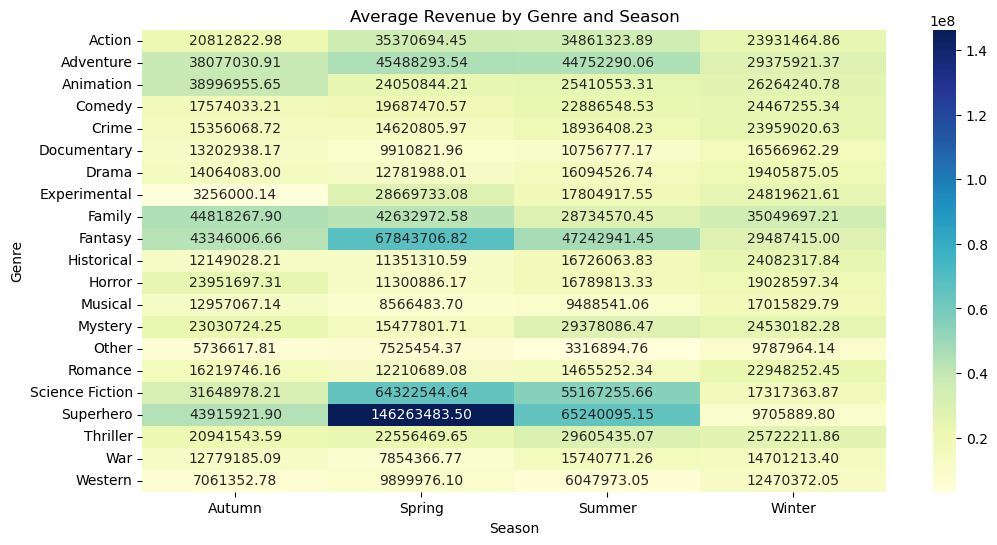

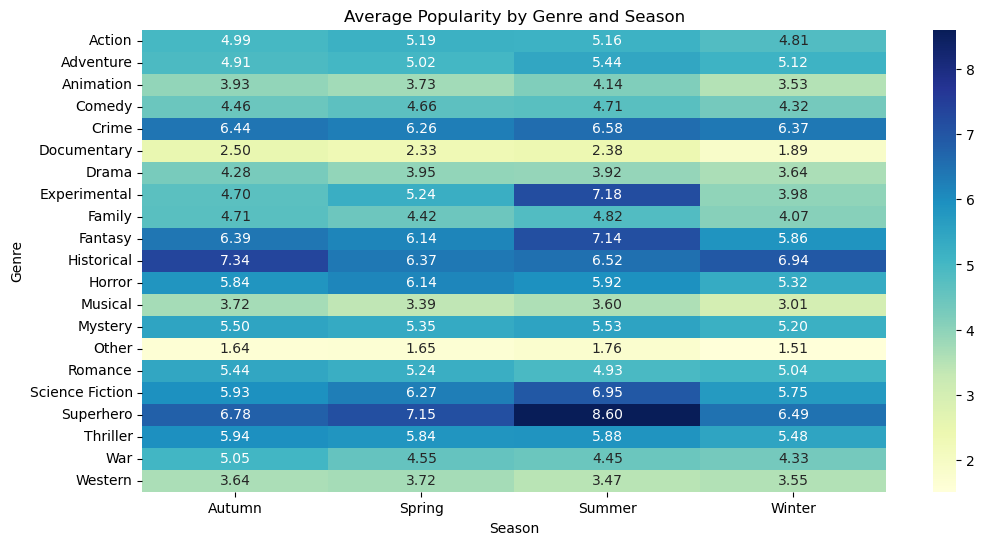

In [ ]:
# Do some genres perform better in specifical seasons? (in terms of revenue and popularity score)
revenue_pivot = genre_season_performance.pivot(index='genres', columns='season', values='revenue')
popularity_pivot = genre_season_performance.pivot(index='genres', columns='season', values='popularity')

# Plot heatmaps for revenue and popularity
plt.figure(figsize=(12, 6))
sns.heatmap(revenue_pivot, annot=True, cmap="YlGnBu", fmt='.2f', cbar=True)
plt.title('Average revenue by Genre and Season')
plt.xlabel('Season')
plt.ylabel('Genre')
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap(popularity_pivot, annot=True, cmap="YlGnBu", fmt='.2f', cbar=True)
plt.title('Average popularity by Genre and Season')
plt.xlabel('Season')
plt.ylabel('Genre')
plt.show()

What can easily catch our eye is that Fantasy and Science fiction movies have way bigger average revenue in spring, comparing to other seasons. Why is that? Let's test it first

In [ ]:
spring_revenue = df_seasons[(df_seasons['genres'].apply(lambda x: 'Fantasy' in x or 'Science Fiction' in x)) & (df_seasons['season'] == 'Spring')]['revenue']
other_seasons_revenue = df_seasons[(df_seasons['genres'].apply(lambda x: 'Fantasy' in x or 'Science Fiction' in x)) & (df_seasons['season'] != 'Spring')]['revenue']

t_stat, p_value = ttest_ind(spring_revenue.dropna(), other_seasons_revenue.dropna())

print(f"T-statistic: {t_stat}, p-value: {p_value}")

T-statistic: 0.8365040758677732, p-value: 0.4031095668101782


T-statistic (0.95): The T-statistic measures the size of the difference relative to the variation in your sample data. A value close to 0 indicates that there is little difference between the two groups.

p-value (0.34): The p-value tells you the probability of observing the data if the null hypothesis (no difference between the groups) were true. Since the p-value is greater than 0.05, we fail to reject the null hypothesis at a 5% significance level.

In [ ]:
# Exploding the genres column (so that each genre is a separate row)
df_exploded = df_seasons.explode('genres')

# Create a multiple linear regression model: revenue ~ season + genre + season:genre
model = ols('revenue ~ C(season) + C(´genres´) + C(season):C("genres")', data=df_exploded).fit()

# Print the summary to get the coefficients and p-values
print(model.summary())

PatsyError: error tokenizing input (maybe an unclosed string?)
    Revenue ~ C(season) + C(´Movie genres´) + C(season):C("Movie genres")
                            ^